<img src="img/logo.png">



---
# Sommaire

 1. Introduction
    - 1.1. Importation des librairies
    - 1.2. Chargement du fichier
    - 1.3. Création du sommaire
 2. Exploration - aperçu de l'analyse descriptive des données
 3. Étude des outliers de la variable précédemment imputée 'margin_low'
    - 3.1. Statistiques descriptives et distributions
    - 3.2. Proportion d'outliers parmi les vrais/faux billets
    - 3.3. Visualisations
 4. Vérification de la normalité en vue de l'étude des corrélations
    - 4.1. Graphiques de distribution
    - 4.2. Calcul de Skew, Kurtosis et tests de normalité de D'Agostino-Pearson et Shapiro-Wilk
 5. Corrélation de Spearman
 6. Boxplots
 7. Pairplots
 8. Comparaison des modèles de classification
 9. Régression logistique pour détecter les faux billets
    - 9.1. Rappel des prérequis du modèle
    - 9.2. Vérification de l'équilibre des classes
    - 9.3. Choix des meilleurs paramètres
        - 9.3.1. Choix de la constante ou pas
        - 9.3.2. Choix des variables
        - 9.3.3. Vérification de l'hypothèse de linéarité
 10. Entraînement des modèles de régression logistique
     - 10.1. Modèle complexe GridSearch avec 6 hyperparamètres : C, penalty, solver, class_weight, max_iter et fit_intercept
     - 10.2. Modèle plus simple avec 4 hyperparamètres : penalty, solver, max_iter et fit_intercept
     - 10.3. Modèle simple avec 2 hyperparamètres : max_iter et fit_intercept
        - 10.3.1. SHAP (Shapley Additive exPlanations)
        - 10.3.2. Pickle
 11. K-Means
     - 11.1. Test du choix métier du nombre optimal de clusters
     - 11.2. Visualisation des centroïdes
     - 11.3. Évaluation du modèle K-Means
     - 11.4. Comparaison des clusters K-Means vs. clusters réels
 12. KNN
     - 12.1. Visualisation des scores et taux d'erreurs en fonction du nombre de neighbors
     - 12.2. Création du meilleur modèle avec les paramètres GridSearch
 13. Tree-based Models
     - 13.1. Decision tree
         - 13.1.1. Création du meilleur modèle avec les paramètres GridSearch
         - 13.1.2. Decision Tree : importance des caractéristiques
         - 13.1.3. Visualisation de l'arbre décisionnel
     - 13.2. Random forest
         - 13.2.1. Création du meilleur modèle avec les paramètres GridSearch
         - 13.2.2. Random forest : importance des caractéristiques
         - 13.2.3 Visualisation du premier arbre de la forêt aléatoire
 14. Comparaison des scores des cinq modèles évalués sur le test set

---

# Introduction

## Importation des librairies

In [1]:
%matplotlib inline
# Importations générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
import itertools
import pickle
import os

# Importations spécifiques
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.cm as cm
from matplotlib import cm
import plotly.express as px
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import shapiro, normaltest
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, StackingClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve)
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.calibration import calibration_curve
from scipy.stats import chi2
from pygam import LinearGAM
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from gap_statistic import OptimalK
from kneed import KneeLocator
import shap

# Fonctions personnelles
from mylib.fonction_exploration import exploration_long, exploration1, exploration2, exploration3, exploration4
from mylib.fonction_primary_key import test_pk
from mylib.fonction_merge import df_merge
from mylib.toc import toc
from mylib.fonction_outliers import analyze_outliers, analyze_outliers_bool
from mylib.fonction_distribution_stats import plot_distribution_stats, plot_distribution_comparison
from mylib.fonction_normality import calculate_normality
from mylib.outlier_piecharts import plot_outlier_piecharts
from mylib.regression_analysis import regression_analysis
from mylib.evaluate_models import evaluate_classification_models
from mylib.custom_boxplots import plot_boxplots_bool
from mylib.classification_results import make_results, get_scores
from mylib import fonction_clustering
from mylib.regression_log_analysis import log_regression_analysis
from mylib.visualize_silhouette import silhouette_viz
from mylib.pickle import write_pickle, read_pickle

# Versions des bibliothèques
print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)
print("Version seaborn : " + sns.__version__)
print("Version de scikit-learn:", sklearn.__version__)
print("Version de scipy:", scipy.__version__)

# Paramètres pour le style du texte
bold = "\033[1m"
italic = '\033[3m'
red = '\033[91m'
cyan = "\033[34m"
end = "\033[0;0m"

# Couleurs à contraste élevé pour améliorer l'accessibilité des graphiques
color_true = '#1F77B4'
color_false = '#FF7F0E'

# Couleurs des graphiques
RED = "#E3120B"
GREY = "#a2a2a2"
BLUE = "#076fa2"

Version numpy : 1.23.5
Version pandas : 1.4.4
Version seaborn : 0.12.1
Version de scikit-learn: 1.2.0
Version de scipy: 1.11.2


## Chargement du fichier

In [2]:
chemin_billets = 'src/billets_cleaned.csv'
billets = pd.read_csv(chemin_billets)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Création du sommaire

In [4]:
#file_path = '2.EDA_classification_clustering.ipynb'
#rec_path = '2.EDA_classification_clustering.ipynb'
#toc(file_path, rec_path)

# Exploration - aperçu de l'analyse descriptive des données

In [5]:
billets.sample()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1418        True    172.06       104.19        103.59        4.39       3.22   

      length  
1418  113.69

In [6]:
exploration1(billets) #la fonction est visible dans le fichier mylib

__________ Head __________ 
 
 
   
 is_genuine 
 diagonal 
 height_left 
 height_right 
 margin_low 
 margin_up 
 length 
 
 
 
 
 0 
 False 
 171.750000 
 103.960000 
 103.830000 
 5.390000 
 3.540000 
 109.490000 
 
 
 1 
 False 
 171.550000 
 104.200000 
 104.490000 
 5.420000 
 3.540000 
 109.930000 
 
 
 2 
 False 
 171.680000 
 103.890000 
 103.700000 
 5.970000 
 3.030000 
 109.970000 
 
 
 
 
 
 __________ Tail __________ 
 
 
   
 is_genuine 
 diagonal 
 height_left 
 height_right 
 margin_low 
 margin_up 
 length 
 
 
 
 
 1497 
 True 
 171.740000 
 104.000000 
 103.830000 
 3.950000 
 3.030000 
 114.150000 
 
 
 1498 
 True 
 172.060000 
 104.080000 
 103.470000 
 4.470000 
 2.970000 
 114.320000 
 
 
 1499 
 True 
 171.960000 
 103.840000 
 103.620000 
 4.128719 
 3.010000 
 114.440000 
 
 
 
 
 
 __________ Sample __________ 
 
 
   
 is_genuine 
 diagonal 
 height_left 
 height_right 
 margin_low 
 margin_up 
 length 
 
 
 
 
 508 
 True 
 172.240000 
 104.510000 
 103.900000 
 4.060000 
 2.880000 
 112.580000 
 
 
 1083 
 True 
 172.250000 
 103.960000 
 103.490000 
 4.500000 
 3.290000 
 113.290000 
 
 
 535 
 True 
 172.050000 
 103.420000 
 104.100000 
 4.450000 
 2.990000 
 112.670000

In [7]:
exploration2(billets) #la fonction est visible dans le fichier mylib

Nombre de valeurs totales Type des données Nombre de NaN  \
is_genuine                        1500             bool             0   
diagonal                          1500          float64             0   
height_left                       1500          float64             0   
height_right                      1500          float64             0   
margin_low                        1500          float64             0   
margin_up                         1500          float64             0   
length                            1500          float64             0   

             NaN en % Nombre de valeurs uniques Valeurs uniques en%  
is_genuine       0.00                         2                0.13  
diagonal         0.00                       159               10.60  
height_left      0.00                       155               10.33  
height_right     0.00                       170               11.33  
margin_low       0.00                       316               21.07  
margin_up        0.00                       123                8.20  
length           0.00                       336               22.40

<span style="color:red">**=> Plus de NANs dans la variable margin_low**</span>

In [8]:
exploration3(billets) #la fonction est visible dans le fichier mylib


---------------------------------------
Nombre de lignes et de colonnes (shape)
--------------------------------------- 

(1500, 7) 

--------------------------------------
Affichage des NaN (isna().any(axis=1))
-------------------------------------- 

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: [] 

---------------------------------------
Nombre de doublons (duplicated().sum())
--------------------------------------- 

0 

-----------------------------------------------------
Affichage des doublons (df[df.duplicated()].head(10))
----------------------------------------------------- 

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: [] 



<span style="color:red">**=> Pas de doublons**</span>

In [9]:
exploration4(billets) #la fonction est visible dans le fichier mylib

count unique   top  freq   mean  std    min    25%    50%    75%    max
is_genuine      1500      2  True  1000    NaN  NaN    NaN    NaN    NaN    NaN    NaN
diagonal     1500.00    NaN   NaN   NaN 171.96 0.31 171.04 171.75 171.96 172.17 173.01
height_left  1500.00    NaN   NaN   NaN 104.03 0.30 103.14 103.82 104.04 104.23 104.88
height_right 1500.00    NaN   NaN   NaN 103.92 0.33 102.82 103.71 103.92 104.15 104.95
margin_low   1500.00    NaN   NaN   NaN   4.48 0.66   2.98   4.03   4.31   4.87   6.90
margin_up    1500.00    NaN   NaN   NaN   3.15 0.23   2.27   2.99   3.14   3.31   3.91
length       1500.00    NaN   NaN   NaN 112.68 0.87 109.49 112.03 112.96 113.34 114.44

# Étude des outliers de la variable précédemment imputée 'margin_low'

## Statistiques descriptives et distributions

Total of outliers in the dataset: 82
Percentage of outliers in the dataset: 5.47 %




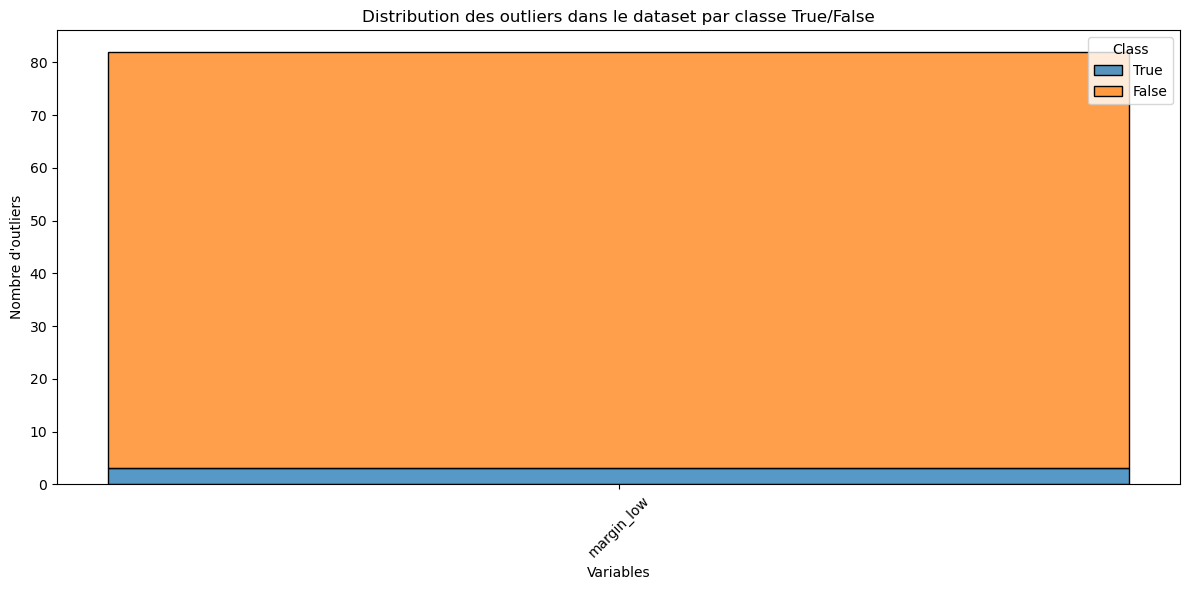


DÉTAIL DES OUTLIERS PAR VARIABLE


margin_low : 82 outliers - 5.47 % of the dataset - min 2.98 - max 6.9 - mean 5.96 - std 0.61

      margin_low  is_genuine
961         2.98        True
1009        3.12        True
1013        3.16        True
103         5.78       False
304         5.78       False
155         5.79       False
83          5.79       False
302         5.80       False
307         5.80       False
154         5.80       False
647         5.82       False
186         5.82       False
446         5.82       False
249         5.85       False
114         5.85       False
26          5.86       False
483         5.86       False
86          5.86       False
108         5.87       False
71          5.87       False
97          5.88       False
471         5.88       False
232         5.89       False
339         5.90       False
65          5.90       False
160         5.91       False
49          5.91       False
960         5.92       False
330         5.92       False


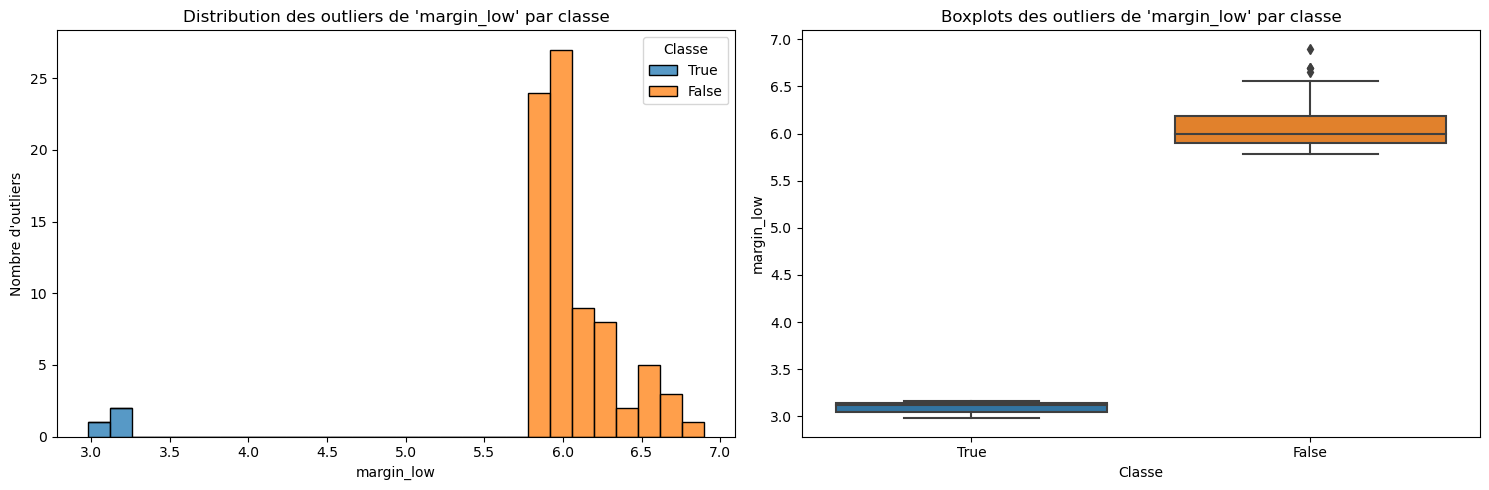

In [10]:
analyze_outliers_bool(billets[['margin_low', 'is_genuine']])

<span style="color:red"> **=> Nous remarquons une claire séparation entre les outliers négatifs qui concernent uniquement les vrais billets et les outliers positifs qui concernent uniquement les faux billets** </span>

Les outliers semblant être, dans une certaine mesure, un indicateur distinctif des vrais/faux billets, nous décidons de les garder pour la suite de l'analyse.

## Proportion d'outliers parmi les vrais/faux billets

In [11]:
# on détermine les colonnes numériques
num = []
for i in billets.columns:
    if billets[i].dtypes == int or billets[i].dtypes == float:
        num.append(i)

In [12]:
# On calcule le z-score sur toutes les variables numériques
outlier_data = []
for i in num:
    billets.sort_values(by=i, inplace=True)
    z_scores = stats.zscore(billets[i])
    outlier_indices = billets.index[z_scores > 1.96]
    outlier_data.extend(billets.loc[outlier_indices, [i, 'is_genuine']].values.tolist())

# Créer le nouveau DataFrame pour les outliers
outliers_df = pd.DataFrame(outlier_data, columns=['Variable', 'is_genuine'])

# Affichage de la distribution en % des True/False parmi les outliers
outliers_true = round(len(outliers_df[outliers_df['is_genuine'] == True]) / len(outliers_df) * 100, 2)
outliers_false = round(len(outliers_df[outliers_df['is_genuine'] == False]) / len(outliers_df) * 100, 2)
print(bold + f"\nLe pourcentage d'outliers qui sont de vrais billets : {outliers_true} %")
print(f"Le pourcentage d'outliers qui sont de faux billets : {outliers_false} %" + end)


Le pourcentage d'outliers qui sont de vrais billets : 22.42 %
Le pourcentage d'outliers qui sont de faux billets : 77.58 %


## Visualisations

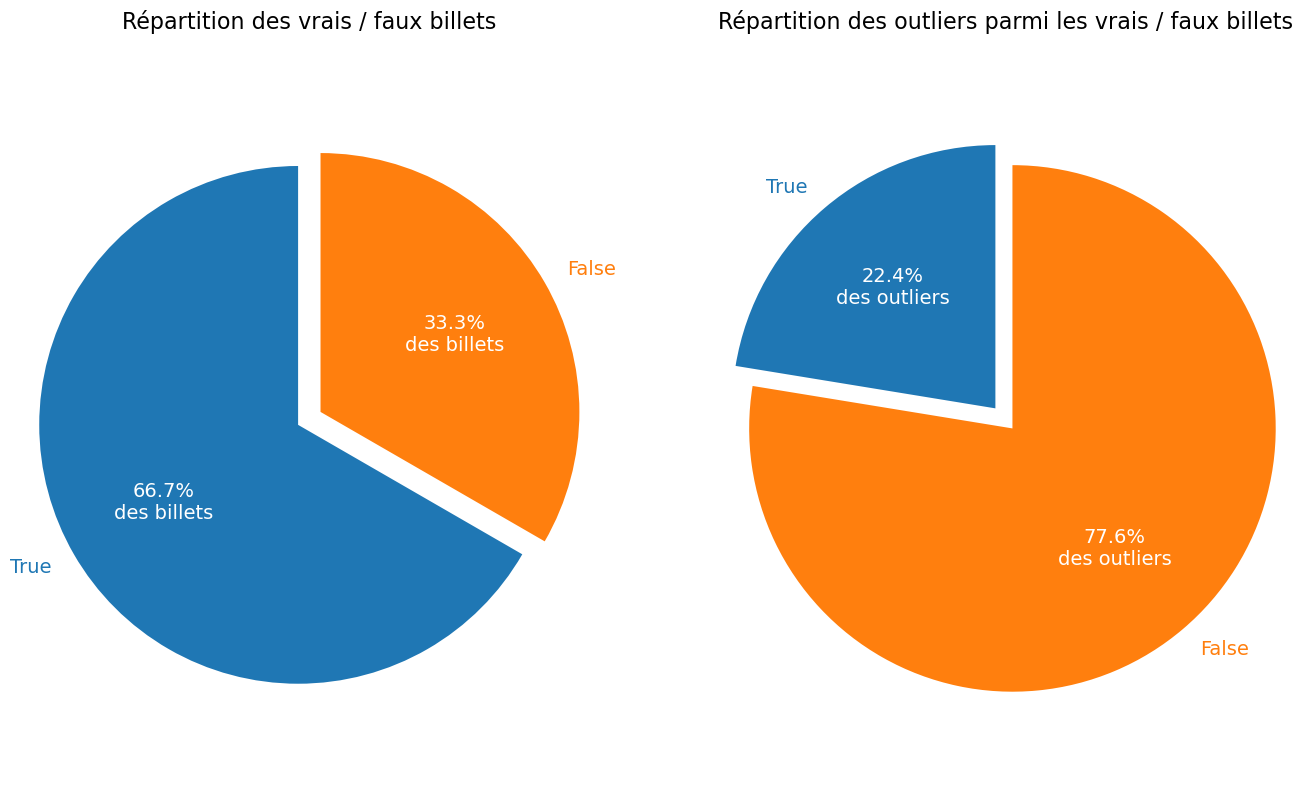

In [13]:
# Utilisation de la fonction visible dans mylib
title1 = "Répartition des vrais / faux billets"
title2 = "Répartition des outliers parmi les vrais / faux billets"

plot_outlier_piecharts(billets, 'is_genuine', title1, title2)

# Vérification de la normalité en vue de l'étude des corrélations

## Graphiques de distribution

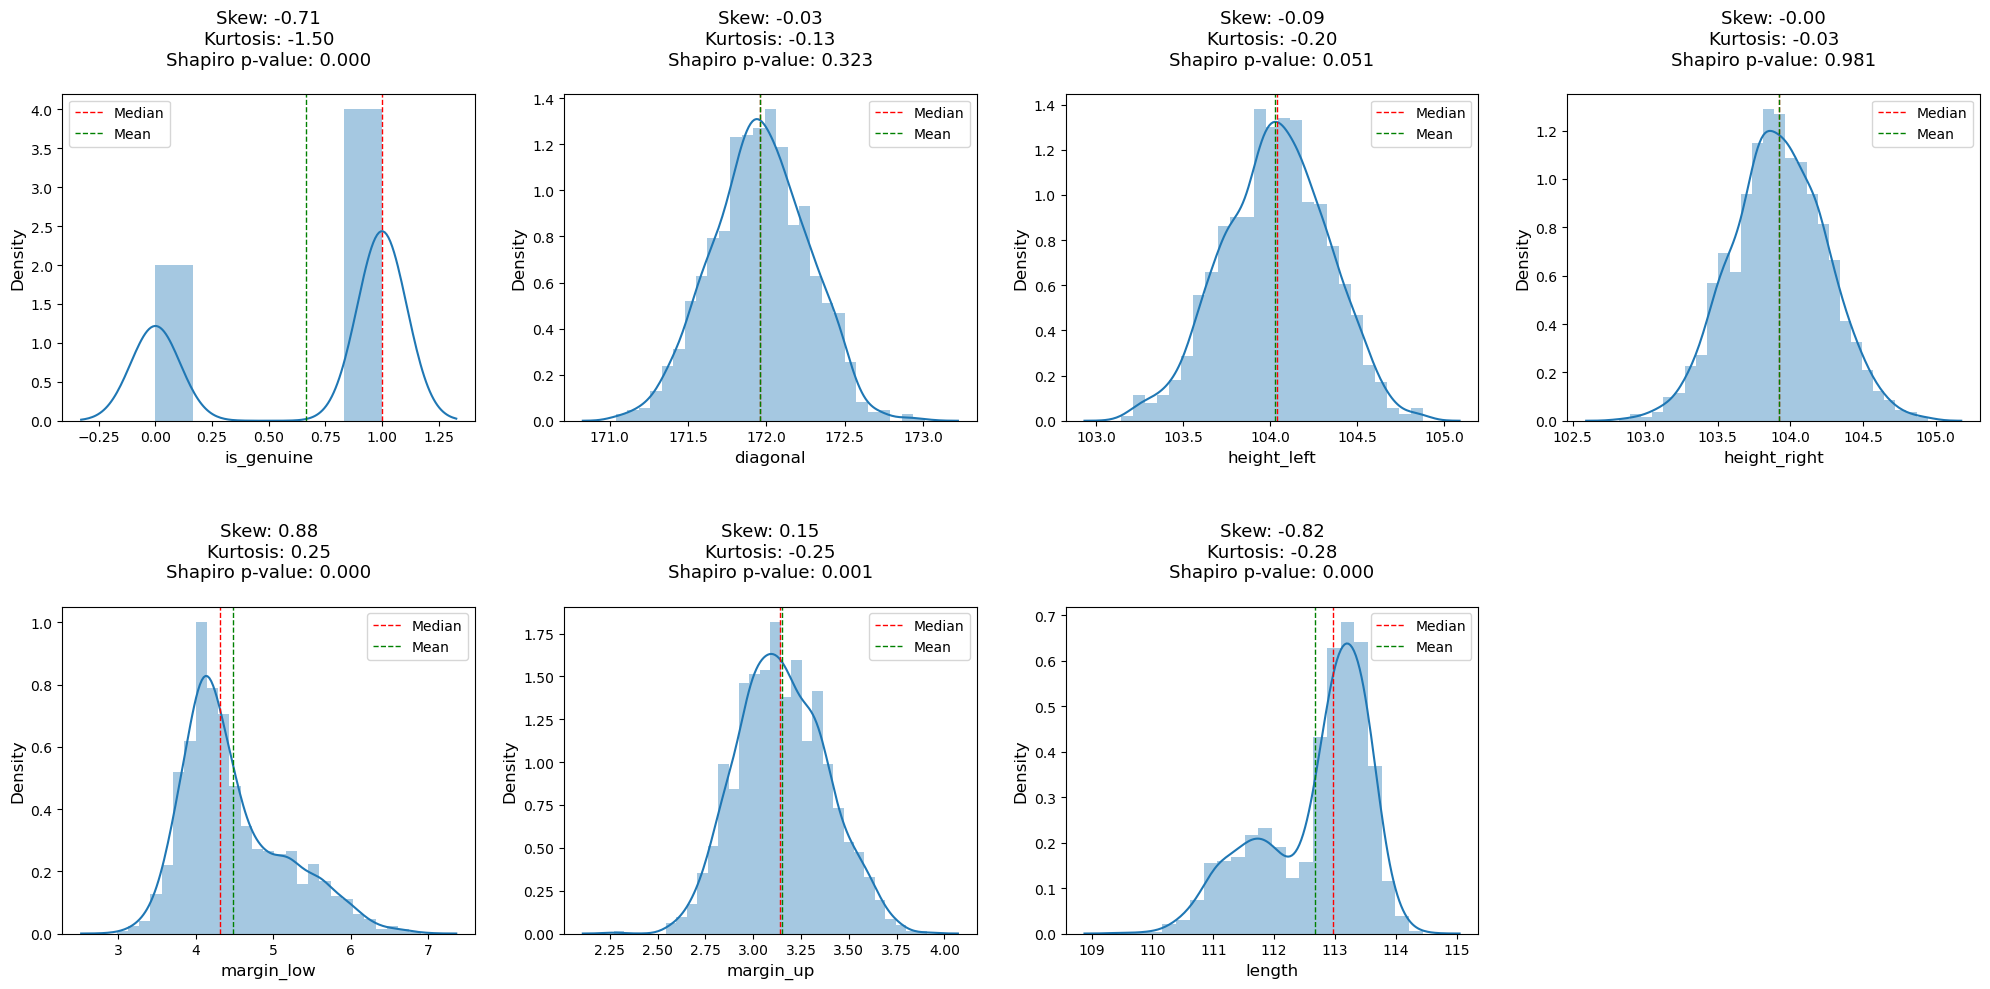

In [14]:
plot_distribution_stats(billets)

## Calcul de Skew, Kurtosis et tests de normalité de D'Agostino-Pearson et Shapiro-Wilk

In [15]:
calculate_normality(billets)

--------------------------------------------------
is_genuine :
Skew: -0.71   The distribution is moderately skewed
Kurtosis: -1.5   The distribution is light-tailed (negative), sometimes called platykurtic distributions 
---
Tests statistiques :
D'Agostino-Pearson: Statistic=10237.5158, p=0.0000 - Sample does not look Gaussian (reject H0)
Shapiro-Wilk: Statistic=0.5949, p=0.0000 - Sample does not look Gaussian (reject H0)
--------------------------------------------------
diagonal :
Skew: -0.03   The distribution is approximately symmetric
Kurtosis: -0.13   The distribution is approximately normal, sometimes called mesokurtic distributions 
---
Tests statistiques :
D'Agostino-Pearson: Statistic=1.2839, p=0.5263 - Sample looks Gaussian (fail to reject H0)
Shapiro-Wilk: Statistic=0.9987, p=0.3234 - Sample looks Gaussian (fail to reject H0)
--------------------------------------------------
height_left :
Skew: -0.09   The distribution is approximately symmetric
Kurtosis: -0.2   The distr

<span style="color:red">**=> Les tests confirment que plusieurs variables sont assymétriques et ne suivent pas la loi gaussienne**</span>
<br><span style="color:red">**=> La normalité de la distribution n'étant pas respectée, la corrélation de Spearman sera choisie pour la suite de l'analyse**</span>

# Corrélation de Spearman

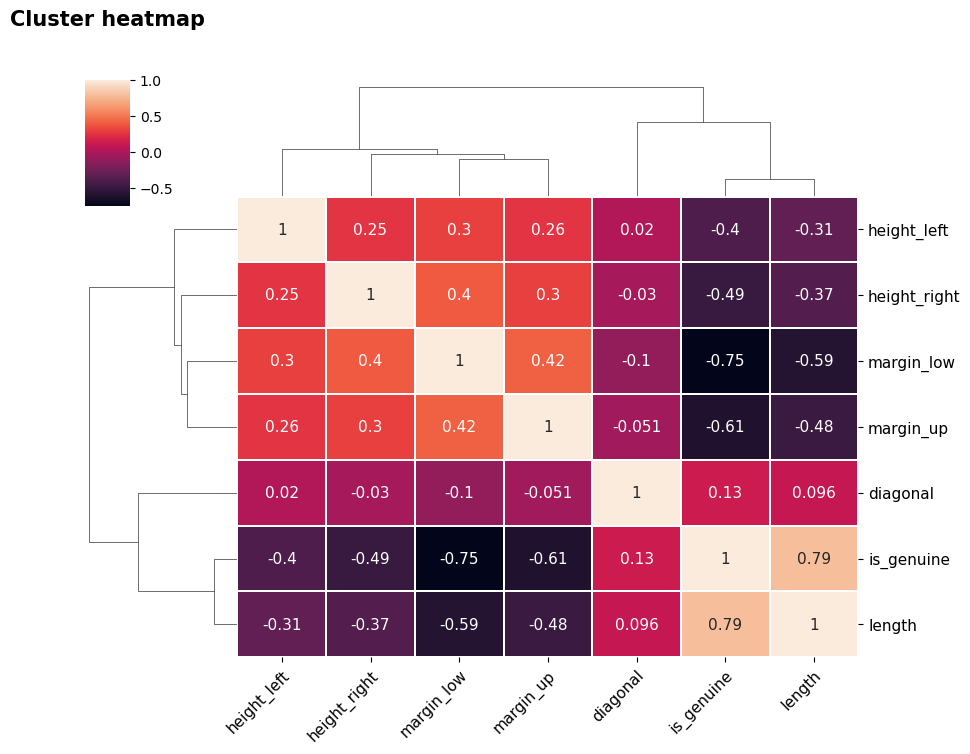

In [16]:
# Créer un clustermap
corr = billets.corr(method='spearman')
g = sns.clustermap(data=corr, linewidths=0.1, annot=True, annot_kws={"size": 11},
                   figsize=(9, 7))

# Personnaliser les étiquettes d'axe
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=11)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=11)

# Titre du clustermap
plt.title("Cluster heatmap\n\n", size=15, fontweight='bold')

plt.savefig('Cluster heatmap.jpeg')
plt.show()

=> On remarque deux groupes distincts :
1. `height_left`, `height_right`, `margin_low` et `margin_up`
2. `diagonal`, `is_genuine` et `length`

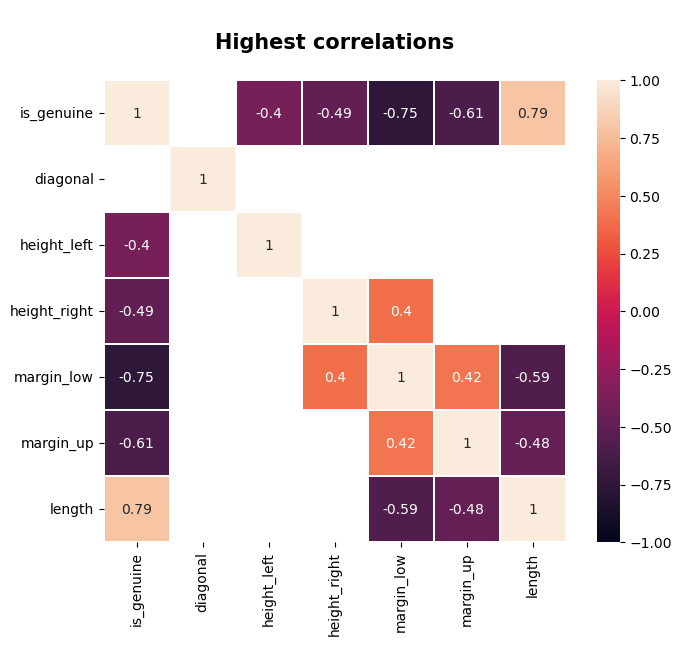

In [17]:
# On va visualiser les corrélations les plus élevées
corr = billets.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr[(corr >= 0.395) | (corr <= -0.395)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("\nHighest correlations\n", size=15, fontweight='bold' )
plt.savefig('highest_corr.jpeg');

<span style="color:red">**=> On remarque les corrélations suivantes :**</span>

+ is_genuine avec :
    + length
    + margin_low
    + margin_up
    + height_right
<br><br>
+ margin_low avec :
    + is_genuine
    + length
    + margin_up
    + height_right
<br><br>
+ margin_up avec :
    + is_genuine
    + length
    + margin_low
<br><br>
+ length avec : 
    + is_genuine
    + margin_low
    + margin_up
    
<span style="color:red">**=> Ainsi les variables ayant le plus d'influence sont length, margin_low puis margin_up**</span>

# Boxplots

In [18]:
# Moyennes et médianes des variables en fonction des Vrais/Faux billets
billets.groupby(['is_genuine']).agg([np.mean, np.median])

diagonal        height_left        height_right        margin_low        margin_up        length       
               mean median        mean median         mean median       mean median      mean median   mean median
is_genuine                                                                                                        
False        171.90 171.91      104.19 104.18       104.14 104.16       5.22   5.20      3.35   3.35 111.63 111.63
True         171.99 171.99      103.95 103.95       103.81 103.81       4.12   4.12      3.05   3.05 113.20 113.20

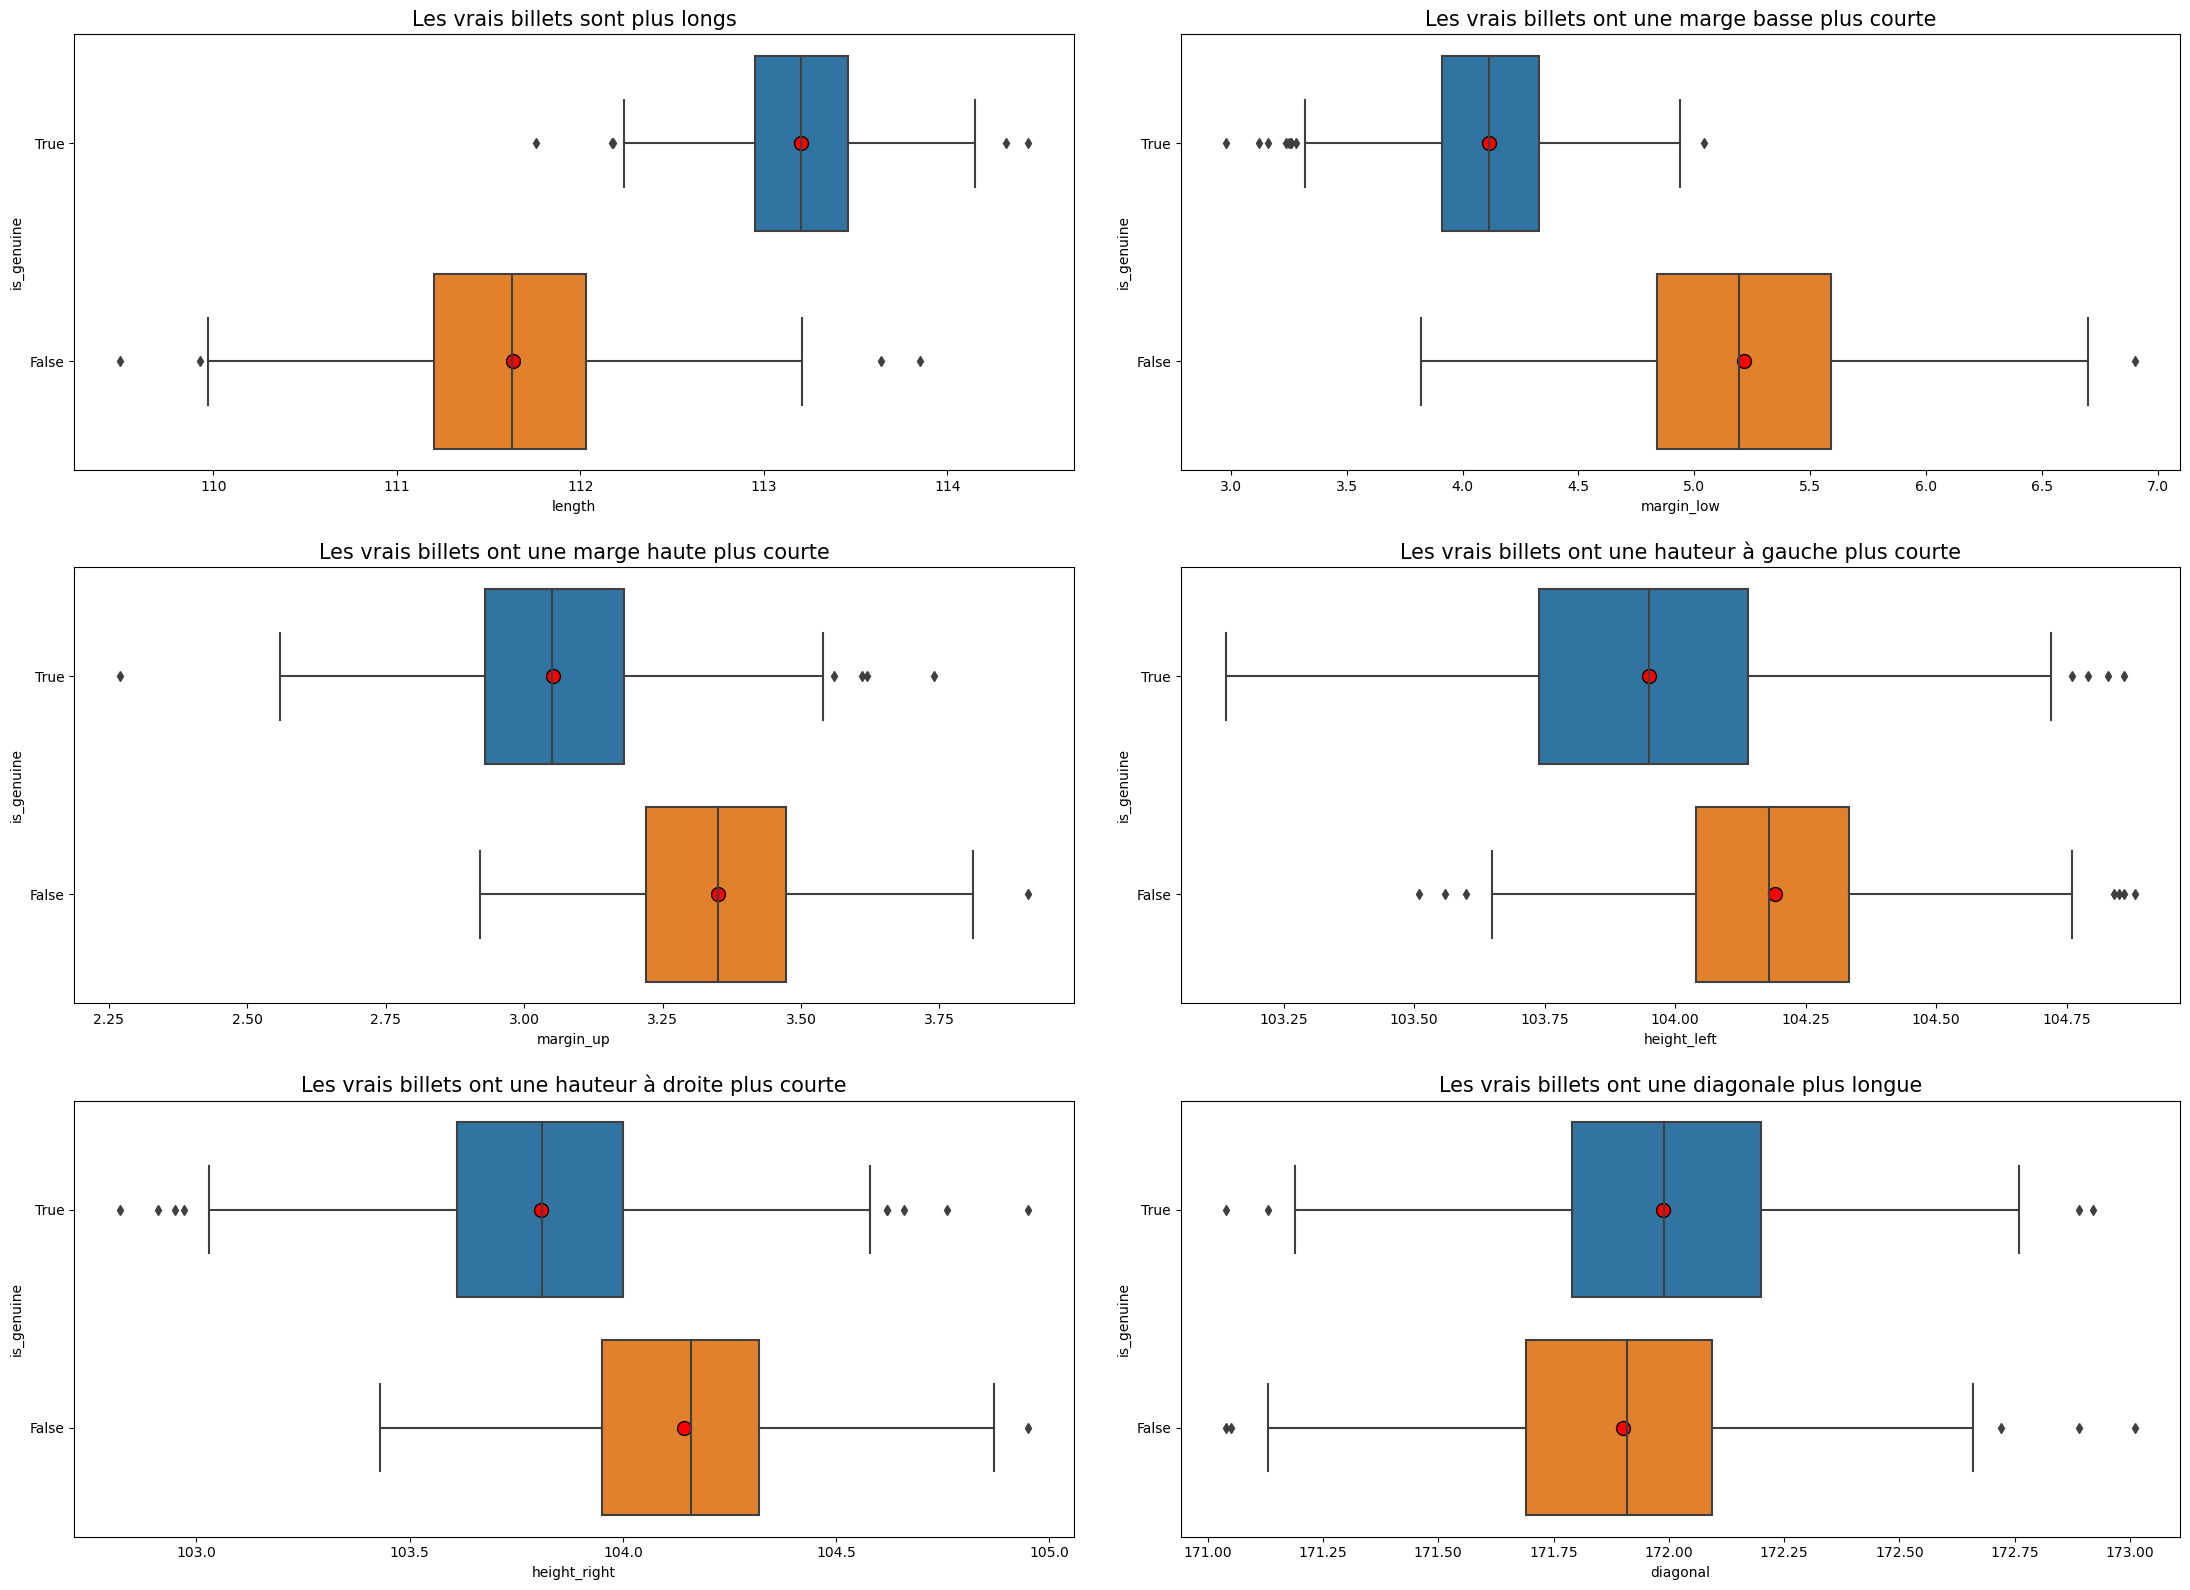

In [19]:
# Liste des variables à traiter
variables = ['length', 'margin_low', 'margin_up', 'height_left', 'height_right', 'diagonal']

# Liste des titres personnalisés pour chaque graphique
titles = ['Les vrais billets sont plus longs', 
          'Les vrais billets ont une marge basse plus courte',
          'Les vrais billets ont une marge haute plus courte', 
          'Les vrais billets ont une hauteur à gauche plus courte',
          'Les vrais billets ont une hauteur à droite plus courte', 
          'Les vrais billets ont une diagonale plus longue']

plot_boxplots_bool(billets, variables, titles, target_variable='is_genuine')

# Pairplots

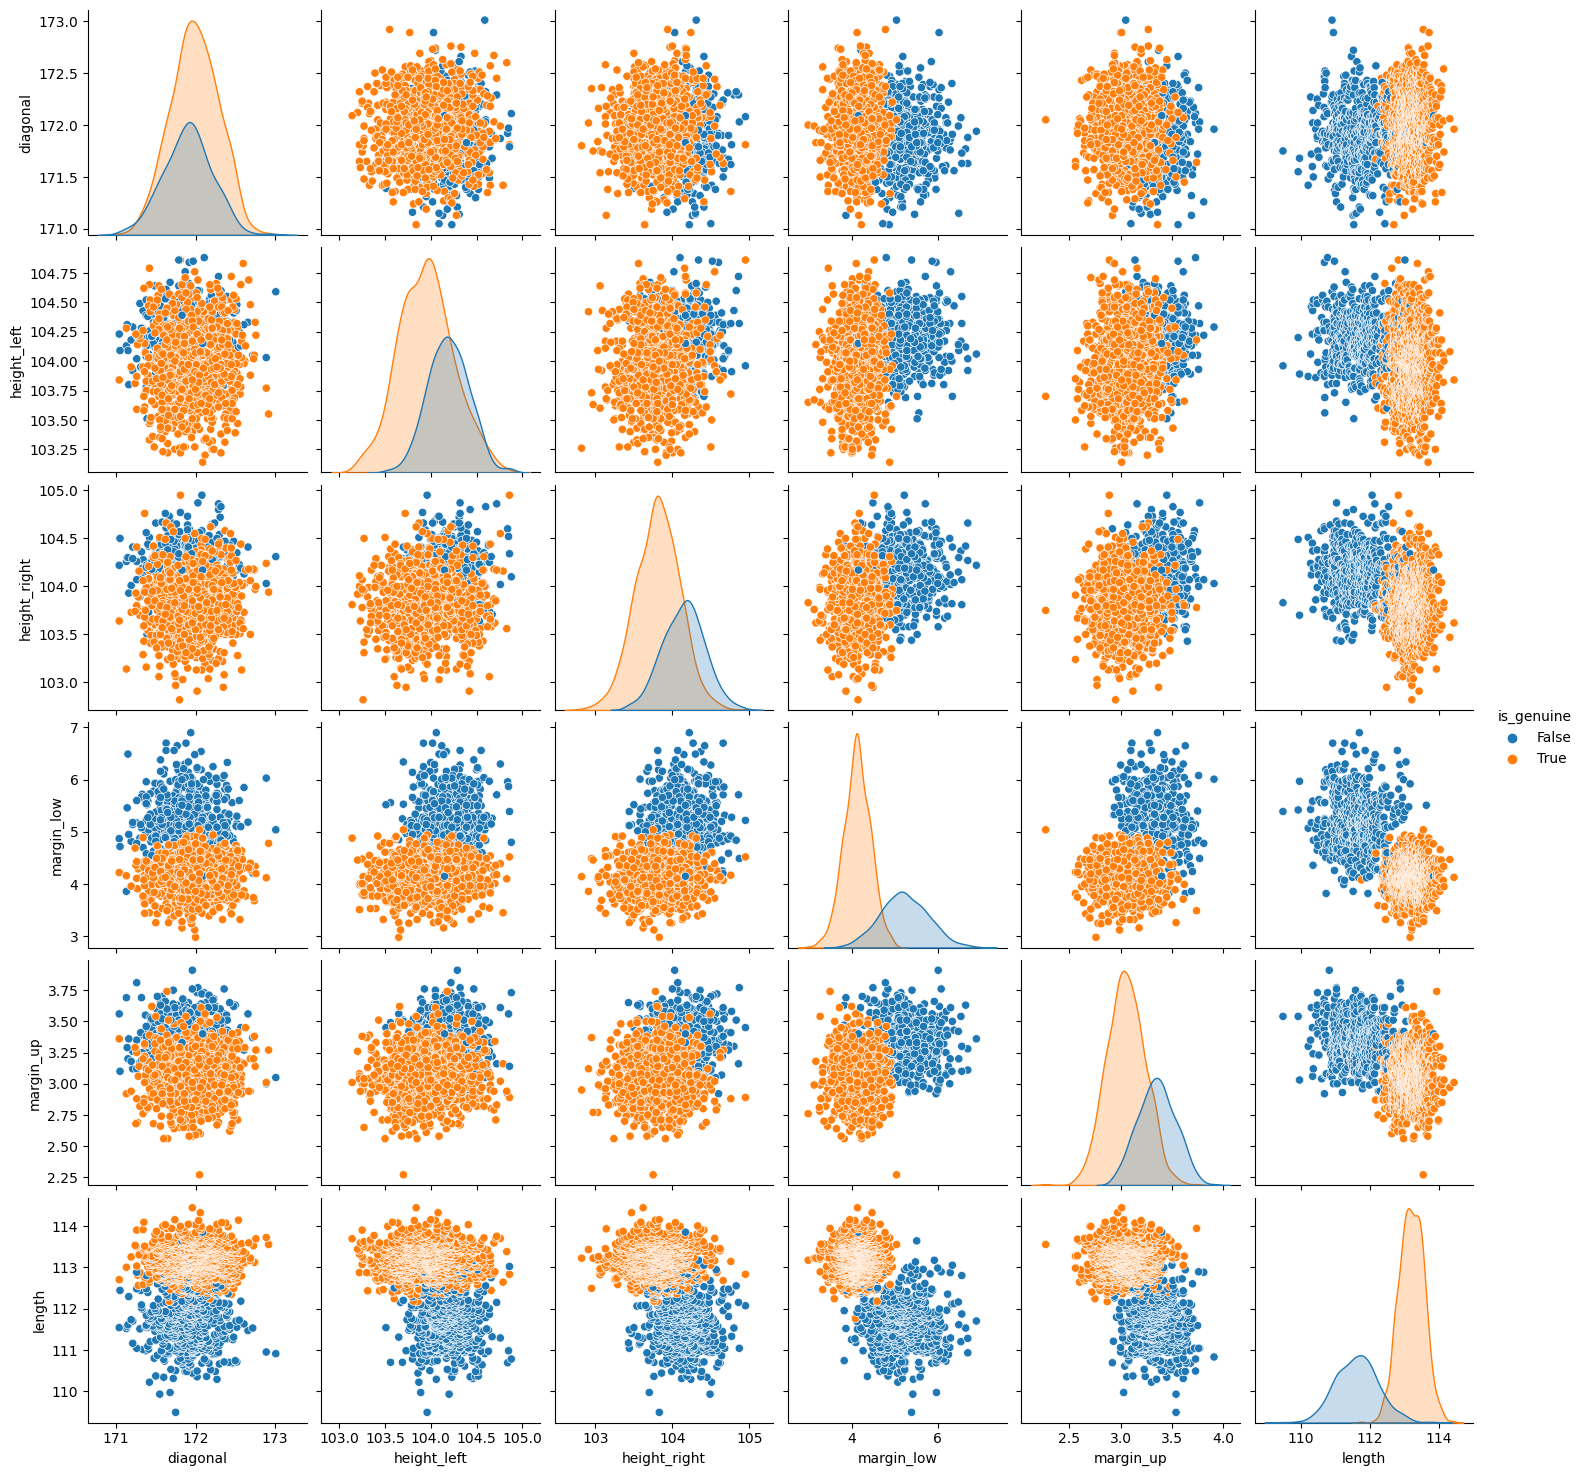

In [20]:
# Pairplot
sns.pairplot(data=billets, hue='is_genuine') #diag_kind="hist", kind="kde"

# Affichage
plt.show()

<span style="color:red">**=> On remarque que les combinaisons de variables ci-dessous ont une faible contribution dans la distinction des vrais/faux billets :**</span> 
+ diagonale vs. hauteur gauche
+ diagonale vs. hauteur droite
+ hauteur gauche vs. hauteur droite
    

<span style="color:red">**=> Une distinction est notable avec les combinaisons de variables suivantes :**</span>

+ length vs. diagonal
+ length vs. height_left
+ length vs. height_right
+ length vs. margin_low
+ length vs. margin_up
<br><br>    
+ margin_low vs. diagonal
+ margin_low vs. height_left
+ margin_low vs. height_right
+ margin_low vs. margin_low
+ margin_low vs. margin_up

# Comparaison des modèles de classification

In [21]:
# Sélection des variables
X = billets.drop(['is_genuine', 'diagonal'], axis=1)
y = billets['is_genuine']

# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

                                      Accuracy  Recall  Precision  F1 Score
Random Forest Classifier                 0.990   0.995      0.990     0.993
K-Nearest Neighbors (KNN) Classifier     0.990   0.995      0.990     0.993
Gaussian Naive Bayes                     0.990   0.995      0.990     0.993
Gradient Boosting Classifier             0.990   0.995      0.990     0.993
Stacking Classifier                      0.990   0.995      0.990     0.993
Logistic Regression                      0.987   0.995      0.985     0.990
Bagging Classifier                       0.987   0.990      0.990     0.990
Decision Tree Classifier                 0.983   0.980      0.995     0.988
AdaBoost Classifier                      0.983   0.985      0.990     0.988
SVM with Polynomial Kernel               0.947   0.995      0.931     0.962
SVM with RBF Kernel                      0.680   1.000      0.680     0.810
Multinomial Naive Bayes                  0.680   1.000      0.680     0.810


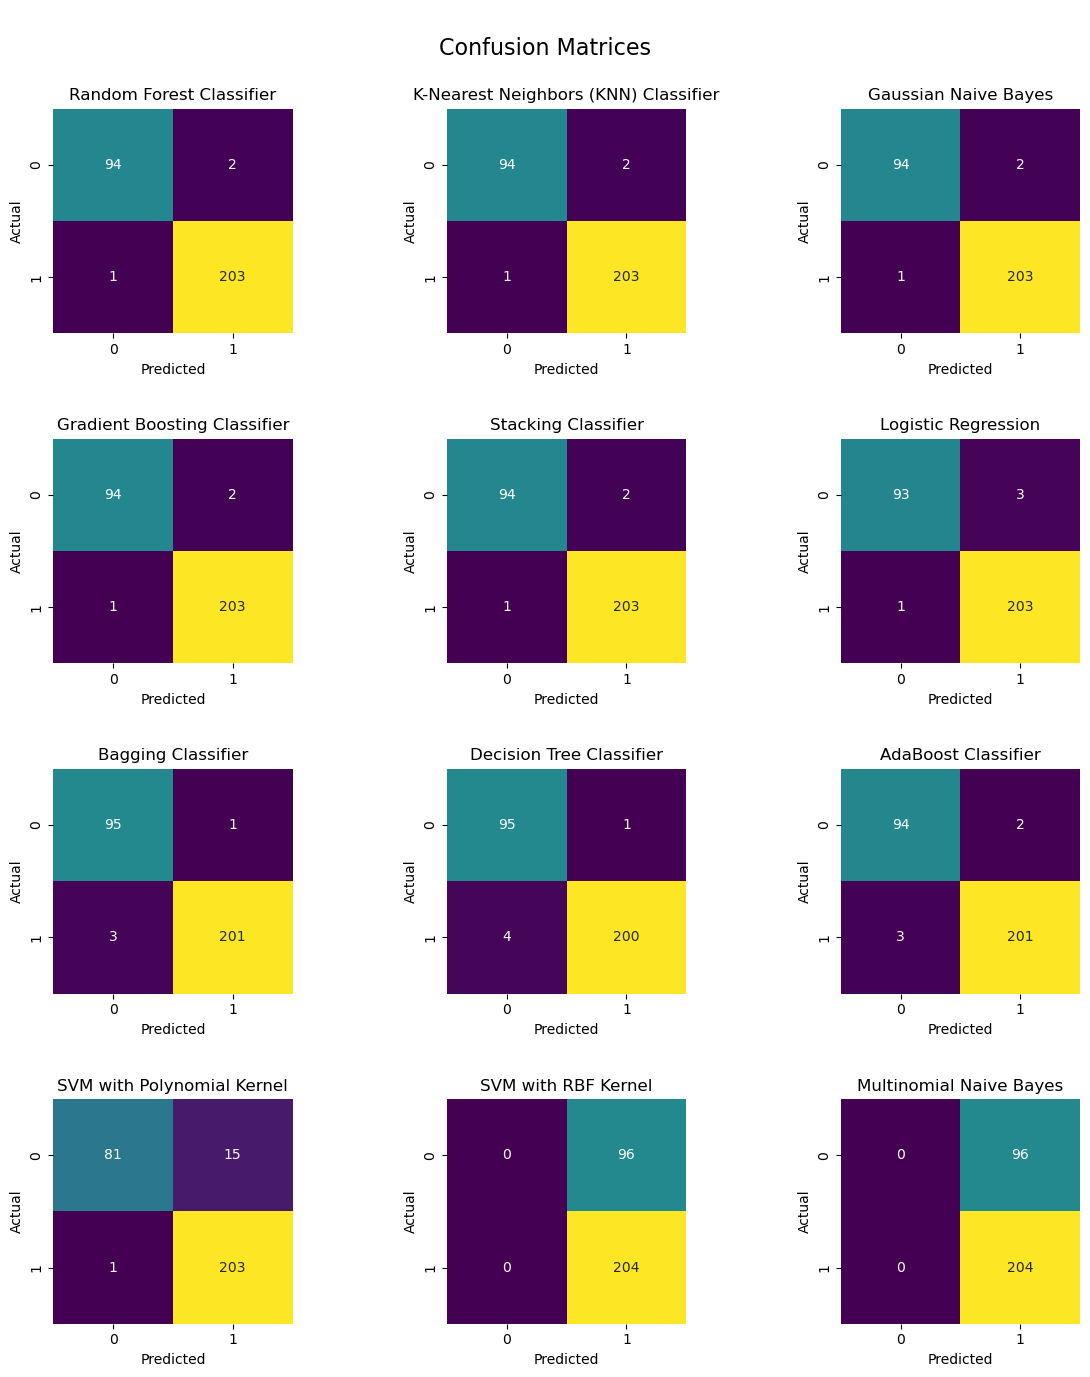

In [22]:
# Utilisation de la fonction depuis mylib
evaluate_classification_models(X_train, X_test, y_train, y_test, cf_matrix=True)

1. **AUC (Area Under the ROC Curve)** : Mesure la capacité d'un modèle de classification à distinguer entre les classes en évaluant la courbe ROC. Une valeur élevée d'AUC indique de bonnes performances de classification.

2. **Précision (Precision)** : Le ratio de vrais positifs parmi les prédictions positives. Mesure la précision des prédictions positives et est sensible aux faux positifs.

3. **Rappel (Recall)** : Le ratio de vrais positifs parmi tous les exemples réels positifs. Mesure la capacité à identifier tous les exemples positifs et est sensible aux faux négatifs.

4. **F1 Score** : Une métrique qui combine précision et rappel en une seule valeur, équilibrant la trade-off entre les faux positifs et les faux négatifs.

5. **Exactitude (Accuracy)** : Le ratio de prédictions correctes parmi toutes les prédictions. Mesure la précision globale du modèle, mais peut être biaisée lorsque les classes sont déséquilibrées.

<div class="alert alert-block alert-warning">
<b></b>=> Les résultats montrent que les modèles Random Forest et KNN sont les plus performants
    <br>=> Cependant dans le cadre de ce projet nous réaliserons une régression logistique, tel que demandé dans le cahier des charges par l'entreprise pour détecter les faux billets, et nous proposerons en annexe les deux modèles cités ci-dessus
</div>

# Régression logistique pour détecter les faux billets

## Rappel des prérequis du modèle

**Hypothèses du modèle de régression logistique**
- La variable de résultat est catégorielle
- Les observations sont indépendantes les unes des autres
- Pas de multicolinéarité sévère parmi les variables X
- Pas de valeurs aberrantes extrêmes, il faut les identifier et déterminer si elles doivent être ajustées ou supprimées
- Relation linéaire entre chaque variable X et le logit de la variable de résultat
- Taille de l'échantillon suffisamment grande

## Vérification de l'équilibre des classes

Nous vérifions l'équilibre des classes dans les données (nous vérifions les décomptes de valeurs dans la colonne `is_genuine`). Étant donné qu'il s'agit d'une tâche de classification binaire, l'équilibre des classes informe la manière dont nous interprétons les métriques de précision.

In [23]:
# Vérification du nombre normalisé de valeurs par catégorie 'Vrai'/'Faux'
billets['is_genuine'].value_counts(normalize=True)

True    0.667
False   0.333
Name: is_genuine, dtype: float64

Il y a environ une répartition de 67 % - 33 %. Ainsi, les données ne sont pas parfaitement équilibrées, mais elles ne sont pas trop déséquilibrées non plus. Si elles étaient plus déséquilibrées, nous pourrions envisager de rééchantillonner les données pour les équilibrer davantage. Dans ce cas, nous pouvons utiliser ces données sans modifier l'équilibre des classes et continuer à évaluer le modèle.

## Choix des meilleurs paramètres

### Choix de la constante ou pas

In [24]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(billets[['length', 'margin_low', 'margin_up', 'height_right']], 
                                                    billets['is_genuine'], 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=0)

In [25]:
# Instanciation du modèle (Logistic Regression)
logistic_regression = LogisticRegression(random_state=0)

# Attribution d'un dictionnaire d'hyperparamètres à rechercher
cv_params = {'fit_intercept': [True, False]}

# Attribution d'un dictionnaire de métriques à capturer
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciation de GridSearch
lr = GridSearchCV(logistic_regression, cv_params, scoring=scoring, cv=4, verbose=1, refit='roc_auc')

lr.fit(X_train, y_train)

# Affichage du meilleur paramètre
print(f"Le meilleur paramètre est : {lr.best_params_} avec un score de {round(lr.best_score_, 3)}")

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Le meilleur paramètre est : {'fit_intercept': True} avec un score de 0.998


<span style="color:red">**=> Nous allons donc ajouter une constante au modèle**</span>

### Choix des variables

Backward selection
Certaines variables ne sont pas significatives, nous les supprimons et gardons : length, margin_low, margin_up, height_right.


                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Sep 2023   Pseudo R-squ.:                  0.9579
Time:                        21:10:43   Log-Likelihood:                -40.178
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -282.7473    139.392     -2.028      0.043   

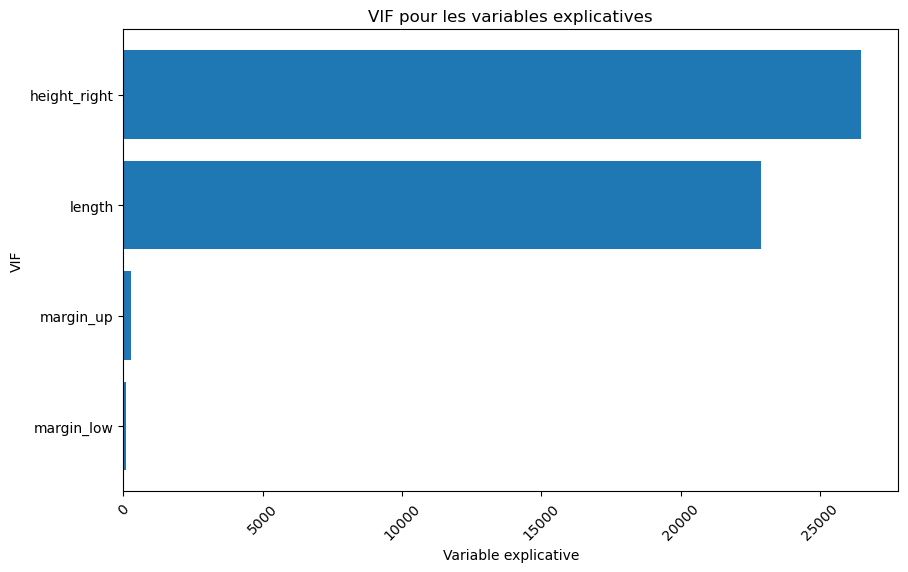

In [26]:
# Liste des variables explicatives
explanatory_vars = ['length', 'margin_low', 'margin_up', 'diagonal', 'height_left', 'height_right']

# Choix de la variable cible
target_variable = 'is_genuine'

log_regression_analysis(billets, target_variable, explanatory_vars, intercept=True, hypo=False) #ajout de la constante

=> Nous détectons une forte colinéarité entre les variables, nous décidons de supprimer une par une celles au VIF le plus élevé jusqu'à arriver à deux variables `margin_low` et `length` avec le même VIF de 43, c'est le plus petit score VIF pour notre dataset, nous avons donc toujours une multicolinéarité

=> Nous observons par ailleurs que le score de prédiction diminue fortement en gardant uniquement ces deux variables, nous décidons donc de garder les quatre variables significatives `margin_low`, `length`, `margin_up` et `height_right`et de procéder à une régression logistique avec régularisation L1 pour atténuer la multicolinéarité

### Vérification de l'hypothèse de linéarité

#### Test de Hosmer-Lemeshow d'adéquation de l'ajustement du modèle de regression logistique aux données

In [27]:
# Prédictions des probabilités sur l'ensemble de test
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calcul des résidus
residuals = y_test - y_pred_prob_lr

# Calcul des fréquences attendues et observées
freq_expected, freq_observed = calibration_curve(y_test, y_pred_prob_lr, n_bins=10)

# Calcul de la statistique de Hosmer-Lemeshow
hl_statistic = ((freq_observed - freq_expected) ** 2 / freq_expected).sum()

# Affichage de la statistique de Hosmer-Lemeshow et de la p-value
print("\nTest de Hosmer-Lemeshow (H0 : Linéarité de la régression)")
print(f"Statistique de Hosmer-Lemeshow : {hl_statistic:.4f}")
degrees_of_freedom = len(freq_observed) - 2

p_value = 1 - chi2.cdf(hl_statistic, degrees_of_freedom)
print(f"P-value : {p_value:.4f}")

if p_value < 0.05:
    print("La p-value est inférieure à 0.05, ce qui suggère que l'hypothèse de linéarité n'est pas vérifiée.")
else:
    print("La p-value est supérieure à 0.05, ce qui suggère que l'hypothèse de linéarité est vérifiée.")


Test de Hosmer-Lemeshow (H0 : Linéarité de la régression)
Statistique de Hosmer-Lemeshow : inf
P-value : 0.0000
La p-value est inférieure à 0.05, ce qui suggère que l'hypothèse de linéarité n'est pas vérifiée.


<span style="color:red">**=> La relation entre chaque variable indépendante et le logit de la variable cible n'est pas linéaire, il semble donc que le modèle de régression logistique ne capture pas correctement la relation entre les variables et ne s'ajuste ainsi pas correctement aux données**</span>

Cela peut compromettre la performance et l'interprétation du modèle de régression logistique avec des biais de prédiction et une interprétation des coefficients plus complexe et moins informative.

Pour y pallier, il est possible de procéder à des transformations des variables, telles que logarithmiques ou polynomiales pour mieux capturer la relation sous-jacente. Il peut également être approprié d'explorer des modèles de régression non linéaires, tels que des modèles de régression logistique généralisée (GLM) ou des modèles de forêts aléatoires, qui peuvent mieux s'adapter à des relations complexes.

Nous allons tout de même continuer l'évaluation de notre modéle de régression logistique en gardant ces éléments en tête.

# Entraînement des modèles de régression logistique

In [28]:
# Ré-assignation du type booléen à la variable is_genuine
billets['is_genuine'] = billets['is_genuine'].astype(bool)

In [29]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(billets[['length', 'margin_low', 'margin_up', 'height_right']], 
                                                    billets['is_genuine'], 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=0)

## Modèle complexe GridSearch avec 6 hyperparamètres : C, penalty, solver, class_weight, max_iter et fit_intercept

In [30]:
# Instanciation du modèle (Logistic regression)
logistic_regression = LogisticRegression(random_state=0)

# Attribution d'un dictionnaire d'hyperparamètres à rechercher
cv_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'penalty': [None, 'l1', 'l2'],
             'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'class_weight': [None, 'auto', 'balanced', 'balanced-subsample'],
             'max_iter': [100, 200, 300],
             'fit_intercept': [True, False]
             }

# Attribution d'un dictionnaire de métriques à capturer
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciation de GridSearch
lr = GridSearchCV(logistic_regression, cv_params, scoring=scoring, cv=4, verbose=1, refit='roc_auc')

lr.fit(X_train, y_train)

# Affichage du meilleur paramètre
print(f"Les meilleurs paramètres sont : {lr.best_params_} avec un score de {round(lr.best_score_, 3)}")

Fitting 4 folds for each of 2160 candidates, totalling 8640 fits
Les meilleurs paramètres sont : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': None, 'solver': 'lbfgs'} avec un score de 0.999


<span style="color:red">**=> Nous souhaitions utiliser une régularisation L1 pour atténuer la multicolinéarité, cependant GridSearch indique que le meilleur modèle n'utilise pas de pénalité, nous l'imposerons dans la deuxième modélisation et comparerons les résultats**</span>

In [31]:
# Scores de cross-validation
lr_cv_results = make_results('Logistic Regression cv', lr, 'auc')
lr_cv_results

Model   AUC  Precision  Recall    F1  Accuracy
0  Logistic Regression cv 0.999      0.991   0.996 0.994     0.992

In [32]:
# Scores de prédictions sur le test set
lr_test_scores = get_scores('Logistic Regression test', lr, X_test, y_test)
lr_test_scores

model   AUC  precision  recall    f1  accuracy
0  Logistic Regression test 0.988      0.990   0.995 0.993     0.990

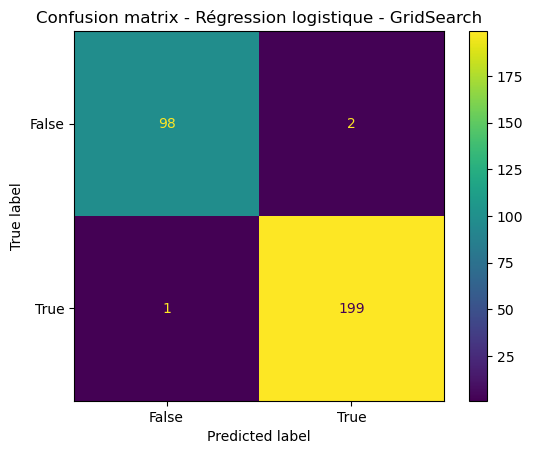

In [33]:
# Générer un tableau de valeurs pour la matrice de confusion
y_pred = lr.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

plt.title("Confusion matrix - Régression logistique - GridSearch");

Le quadrant supérieur gauche affiche le nombre de vrais négatifs (TN).
Le quadrant supérieur droit affiche le nombre de faux positifs (FP).
Le quadrant inférieur gauche affiche le nombre de faux négatifs (FN).
Le quadrant inférieur droit affiche le nombre de vrais positifs (TP).

- Vrais négatifs (TN) : Le nombre de faux billets, et que le modèle a correctement prédits comme étant faux
- Faux positifs (FP) : Le nombre de faux billets, mais que le modèle a incorrectement prédits comme étant vrais
- Faux négatifs (FN) : Le nombre de vrais billets, mais que le modèle a incorrectement prédits comme étant faux
- Vrais positifs (TP) : Le nombre de vrais billets, et que le modèle a correctement prédits comme étant vrais

Un modèle parfait produirait uniquement des vrais négatifs et des vrais positifs, sans faux négatifs ni faux positifs.

Nous créons un rapport de classification qui inclut les métriques de précision, rappel, score F1 et précision globale pour évaluer les performances du modèle de régression logistique.

In [34]:
# Création du rapport de classification Logistic Regression
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       0.99      0.98      0.98       100
Predicted False       0.99      0.99      0.99       200

       accuracy                           0.99       300
      macro avg       0.99      0.99      0.99       300
   weighted avg       0.99      0.99      0.99       300



Regardons les coefficients du meilleur modèle à 6 hyperparamètres :

In [35]:
# Récupérer les coefficients de régression du meilleur modèle de régression logistique
coefficients = lr.best_estimator_.coef_[0]

# Créer un DataFrame avec les coefficients et les noms de colonnes correspondants
logistic_regression_importances = pd.DataFrame({'Coefficient': coefficients}, index=X_train.columns)

# Trier les variables par ordre d'importance (absolue des coefficients) et afficher uniquement les variables avec des coefficients non nuls
logistic_regression_importances = logistic_regression_importances[logistic_regression_importances['Coefficient'] != 0]
logistic_regression_importances = logistic_regression_importances.sort_values(by='Coefficient', key=abs, ascending=False)

# Afficher le DataFrame d'importance des variables
print(logistic_regression_importances)

              Coefficient
margin_up         -10.973
margin_low         -6.381
length              5.511
height_right       -3.666


## Modèle plus simple avec 4 hyperparamètres : penalty, solver, max_iter et fit_intercept

Nous imposons ici la régularisation L1

In [36]:
# Construction du modèle de régression logistique et ajustement à l'ensemble d'entraînement
lr2 = LogisticRegression(penalty='l1', solver='liblinear', random_state=10, max_iter=500, fit_intercept=True).fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lr2.predict(X_test)

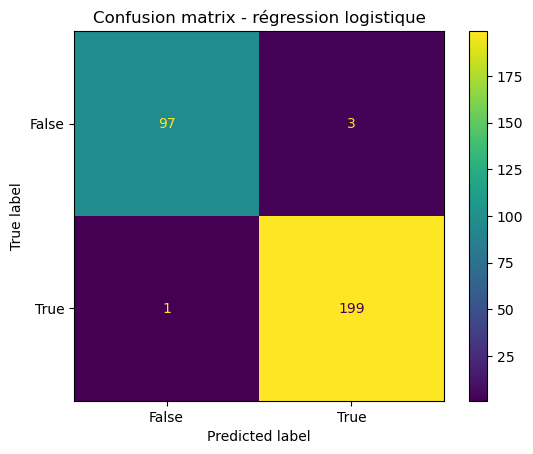

In [37]:
# Calcul des valeurs de la matrice de confusion
log_cm = confusion_matrix(y_test, y_pred, labels=lr2.classes_)

# Création de l'affichage de la matrice de confusion
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=lr2.classes_)

# Affichage de la matrice de confusion
log_disp.plot()

plt.title('Confusion matrix - régression logistique')
plt.show()

In [38]:
# Création du rapport de classification Logistic Regression
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       0.99      0.97      0.98       100
Predicted False       0.99      0.99      0.99       200

       accuracy                           0.99       300
      macro avg       0.99      0.98      0.98       300
   weighted avg       0.99      0.99      0.99       300



Regardons les coefficients et score du modèle à 4 hyperparamètres :

In [39]:
coefficients = lr2.coef_
intercept = lr2.intercept_
score = lr2.score(X_test, y_test)
 
coefficients = lr2.coef_[0]  # Accéder aux coefficients
variable_names = list(X_test.columns)

for i in range(len(variable_names)):
    print(f"Coefficient pour {variable_names[i]} : {coefficients[i]:.3f}")
print(f"Intercept: {intercept[0]:.3f}")
print(f"Score sur le test set: {score:.3f}")

Coefficient pour length : 3.644
Coefficient pour margin_low : -4.761
Coefficient pour margin_up : -6.996
Coefficient pour height_right : -3.514
Intercept: 0.000
Score sur le test set: 0.987


<span style="color:red">**=> Nous remarquons un résultat lègèrement moins bon que pour le modèle sans pénalité, essayons maintenant un dernier modèle encore plus simple et sans pénalité**</span>

## Modèle simple avec 2 hyperparamètres : max_iter et fit_intercept

Nous imposons une constante et un maximum d'itération de 500

In [40]:
# Construction du modèle de régression logistique et ajustement à l'ensemble d'entraînement
lr1 = LogisticRegression(random_state=10, max_iter=500, fit_intercept=True).fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lr1.predict(X_test)

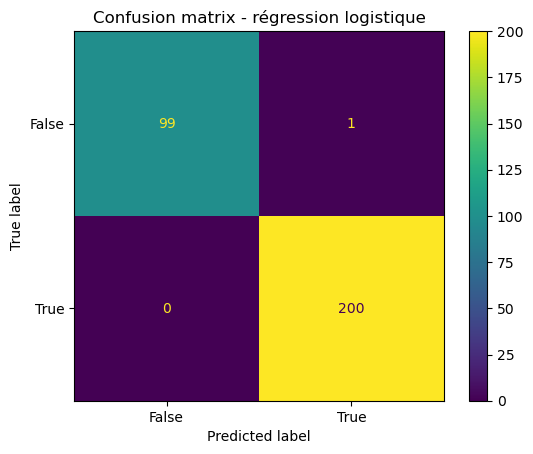

In [41]:
# Calcul des valeurs de la matrice de confusion
log_cm = confusion_matrix(y_test, y_pred, labels=lr1.classes_)

# Création de l'affichage de la matrice de confusion
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=lr1.classes_)

# Affichage de la matrice de confusion
log_disp.plot()

plt.title('Confusion matrix - régression logistique')
plt.show()

In [42]:
# Création du rapport de classification Logistic Regression
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       1.00      0.99      0.99       100
Predicted False       1.00      1.00      1.00       200

       accuracy                           1.00       300
      macro avg       1.00      0.99      1.00       300
   weighted avg       1.00      1.00      1.00       300



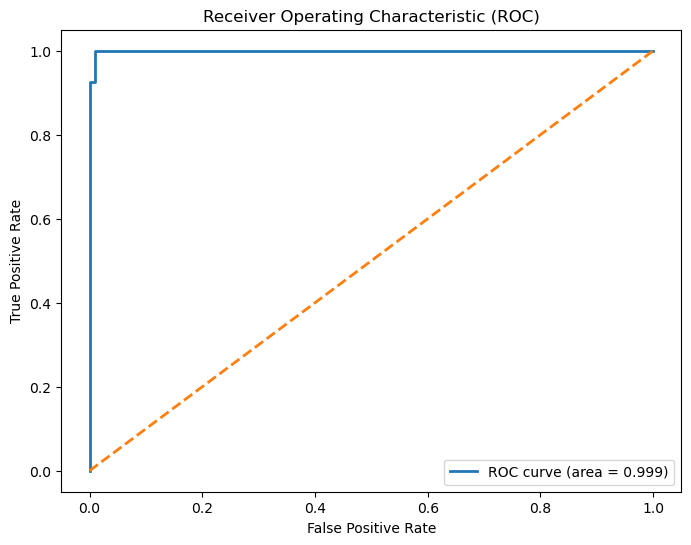

In [43]:
# Prédire les probabilités sur l'ensemble de test
y_pred_prob = lr1.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculer l'AUC (aire sous la courbe)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [44]:
# Calcul du score sur l'ensemble de test
score = lr1.score(X_test, y_test)
print(f"Score sur le test set : {score:.3f}")

Score sur le test set : 0.997


<span style="color:red">**=> Ce modèle a les meilleurs résultats des trois, nous allons le garder pour la future construction de l'algorithme de détection des vrais/faux billets**</span>

### SHAP (SHapley Additive exPlanations)

Le SHAP permet de visualiser comment chaque feature (caractéristique) contribue aux prédictions du modèle.
<br>Les valeurs SHAP peuvent être positives (contribuant à une prédiction plus élevée) ou négatives (contribuant à une prédiction plus basse).

Regardons le SHAP pour notre modèle de régression logistique :

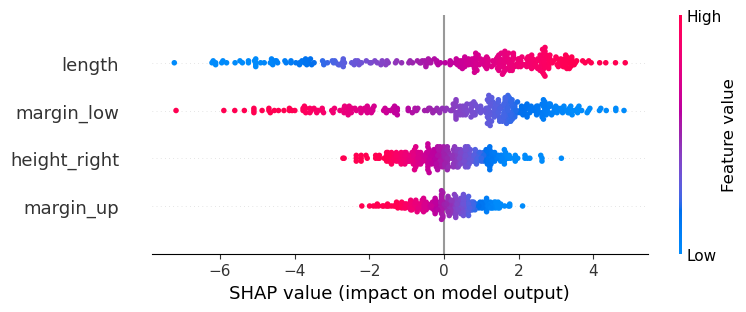

In [45]:
shap.initjs()

# Création de l'explainer SHAP
explainer = shap.Explainer(lr1, X_train)

# Calcul des valeurs SHAP pour un échantillon de données
shap_values = explainer.shap_values(X_test.iloc[0])

# Visualisation des valeurs SHAP pour l'échantillon
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

=> On remarque que `length` et `margin_low` contribuent le plus : lorsque la valeur de `length` augmente, le modèle est plus enclin à prédire True, et lorsque la valeur de `margin_low` augmente, le modèle est plus enclin à prédire False.

Regardons les coefficients de notre modèle : 

In [46]:
coefficients = lr1.coef_[0]  # Accéder aux coefficients
intercept = lr1.intercept_

variable_names = list(X_test.columns)
for i in range(len(variable_names)):
    print(f"Coefficient pour {variable_names[i]} : {coefficients[i]:.3f}")
print(f"Intercept: {intercept[0]:.3f}")

Coefficient pour length : 3.256
Coefficient pour margin_low : -3.658
Coefficient pour margin_up : -3.445
Coefficient pour height_right : -3.251
Intercept: -0.055


=> Les coefficients de la régression logistique valident les contributions de `length` et `margin_low` à la variable cible vues avec le SHAP. 

- **Intercept** est la valeur de la variable cible lorsque toutes les autres variables explicatives sont égales à zéro
- **Les coefficients** représentent la relation entre notre variable indépendante et la variable dépendante, où un changement d'exactement 1 à la variable explicative changera la valeur de notre variable cible du même montant que le coefficient

### Pickle

Nous enregistrons notre modèle sous le format pickle pour une future utilisation lors de la création de l'algorithme de détection des vrais / faux billets

In [47]:
# Chemin du dossier actuel
current_directory = os.getcwd()

# Définition du nom de fichier du modèle
model_filename = 'p10_lr1'

# Chemin complet
path = os.path.join(current_directory, model_filename)

# Enregistrement du modèle
write_pickle(path, lr1, '')

# K-Means

Nous connaissons déjà le nombre de clusters souhaité (2) mais vérifions si ce nombre est confirmé avec les différentes méthodes d'optimisation du K-Means

- Silhouette
- Davies-Bouldin
- Calinski-Harabasz
- Elbow method
- Gap statistic

## Test du choix métier du nombre optimal de clusters

### Silhouette, Davies-Bouldin, Calinski-Harabasz

In [48]:
# définition de DataFrame vide
df_metrics_kmeans = pd.DataFrame()

In [49]:
# tuning des hyperparamètres n_clusters, linkage, affinity
n_clusters = range(2, 9)
init = ['k-means++', 'random']
random_seed=1
df_metrics_kmeans = \
    fonction_clustering.calcul_metrics_kmeans(X_train,
                                           df_metrics_kmeans,
                                           'K-Means', 
                                            random_seed,
                                              n_init = range(1, 4),
                                              init=init, 
                                              n_clusters=n_clusters)

In [50]:
# coéfficient de silhouette : le plus proche de 1
df_metrics_kmeans.sort_values(by='silhouette', ascending=False).head(5)

Data type  n_clusters  n_init  type_init  silhouette  davies_bouldin  calinski_harabasz
2   K-Means           2       2  k-means++       0.579           0.664           2195.849
4   K-Means           2       3  k-means++       0.579           0.664           2195.849
0   K-Means           2       1  k-means++       0.578           0.665           2195.855
1   K-Means           2       1     random       0.578           0.665           2195.855
3   K-Means           2       2     random       0.578           0.665           2195.855

In [51]:
# indice de Davies-Bouldin : le plus proche de 0
df_metrics_kmeans.sort_values(by='davies_bouldin').head(5)

Data type  n_clusters  n_init  type_init  silhouette  davies_bouldin  calinski_harabasz
2   K-Means           2       2  k-means++       0.579           0.664           2195.849
4   K-Means           2       3  k-means++       0.579           0.664           2195.849
0   K-Means           2       1  k-means++       0.578           0.665           2195.855
1   K-Means           2       1     random       0.578           0.665           2195.855
3   K-Means           2       2     random       0.578           0.665           2195.855

In [52]:
# score de Calinski-Harabasz : le plus grand possible
df_metrics_kmeans.sort_values(by='calinski_harabasz', ascending=False).head(5)

Data type  n_clusters  n_init  type_init  silhouette  davies_bouldin  calinski_harabasz
0   K-Means           2       1  k-means++       0.578           0.665           2195.855
1   K-Means           2       1     random       0.578           0.665           2195.855
3   K-Means           2       2     random       0.578           0.665           2195.855
5   K-Means           2       3     random       0.578           0.665           2195.855
2   K-Means           2       2  k-means++       0.579           0.664           2195.849

**Conclusion :**
- Silhouette : 2 clusters
- Davies-Bouldin : 2 clusters
- Calinski-Harabasz : 2 clusters

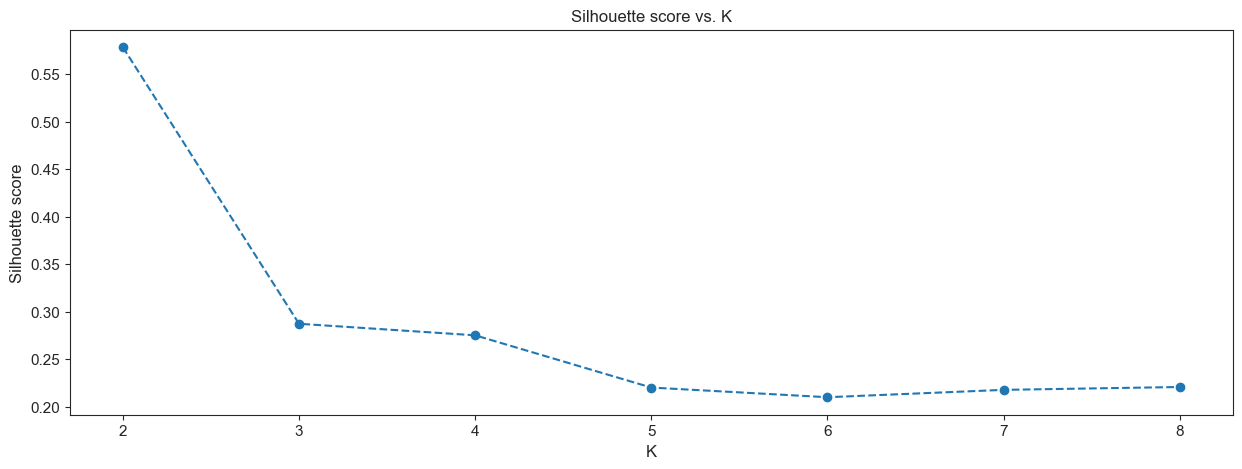

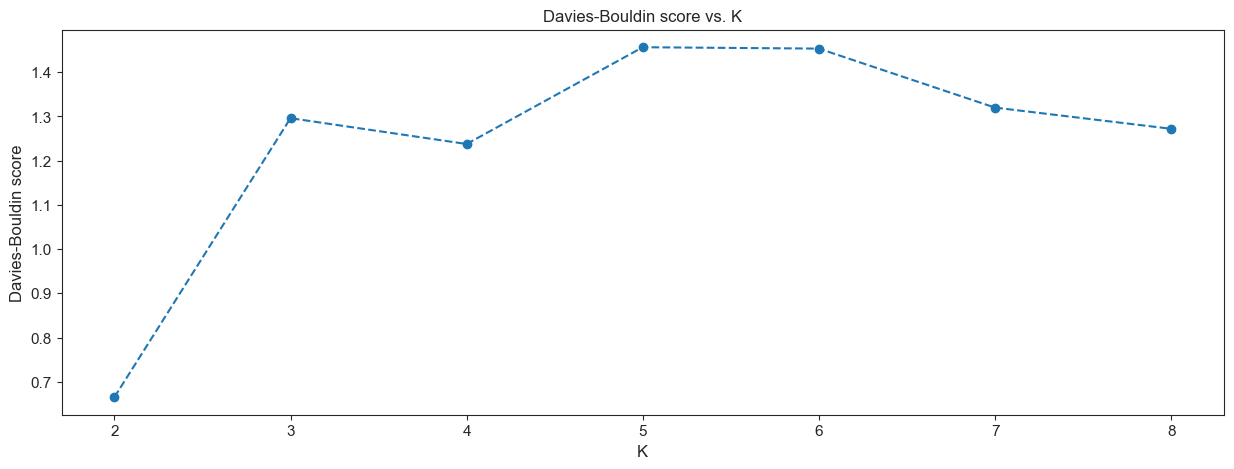

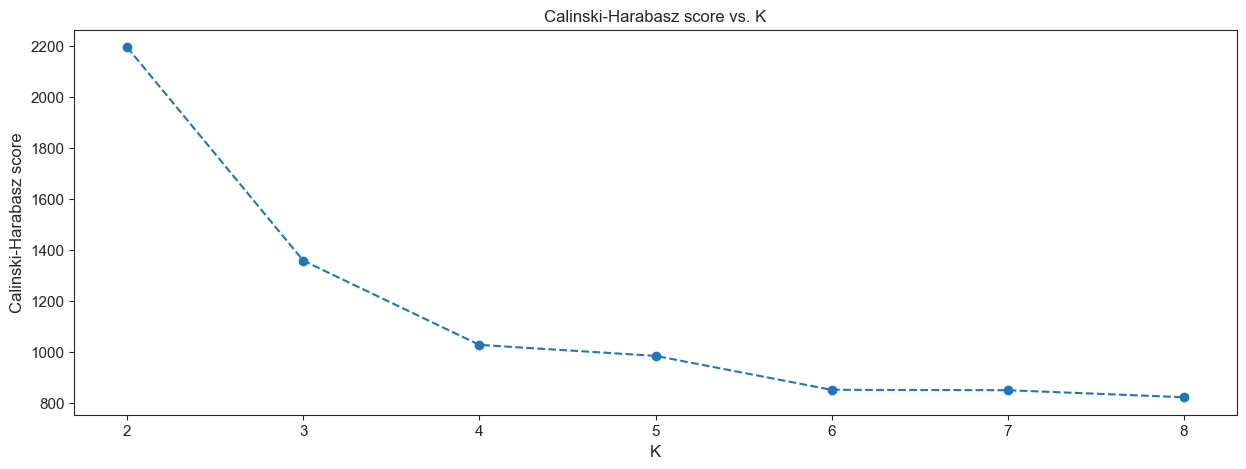

In [53]:
# création de DataFrame pour faciliter la visualisation en utilisant le meilleur score Silhouette
df_kmeans = df_metrics_kmeans[(df_metrics_kmeans['n_init'] == 1) & (df_metrics_kmeans['type_init'] == 'k-means++')]
# visualisation des scores des clusters
sns.set_style('ticks')
fonction_clustering.viz_clusters_score(df_kmeans, 2, 9)

<span style="color:red">**=> Conclusion :**</span>

Meilleurs hyperparamètres :
    
- nombre de clusters : 2
- type init : k-means++

### Silhouette visualization

For n_clusters = 2 The average silhouette_score is : 0.5783217959465766
For n_clusters = 3 The average silhouette_score is : 0.45485286365288485


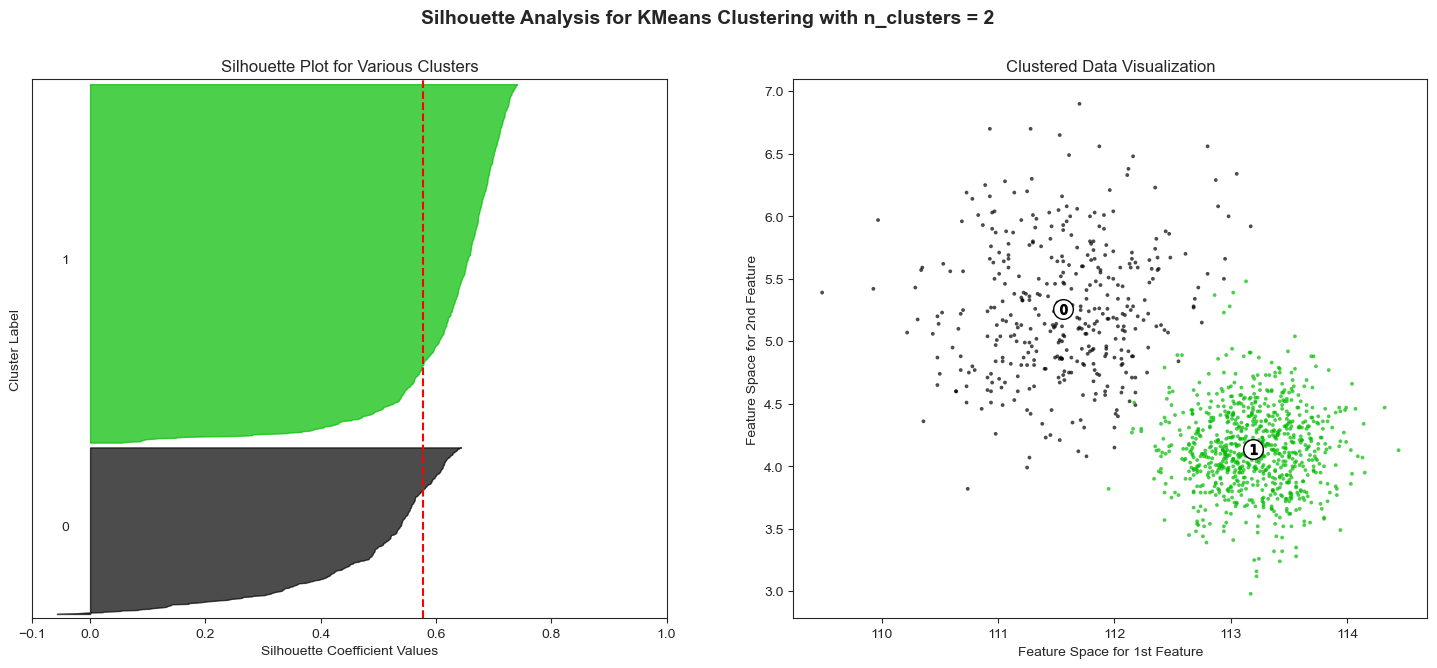

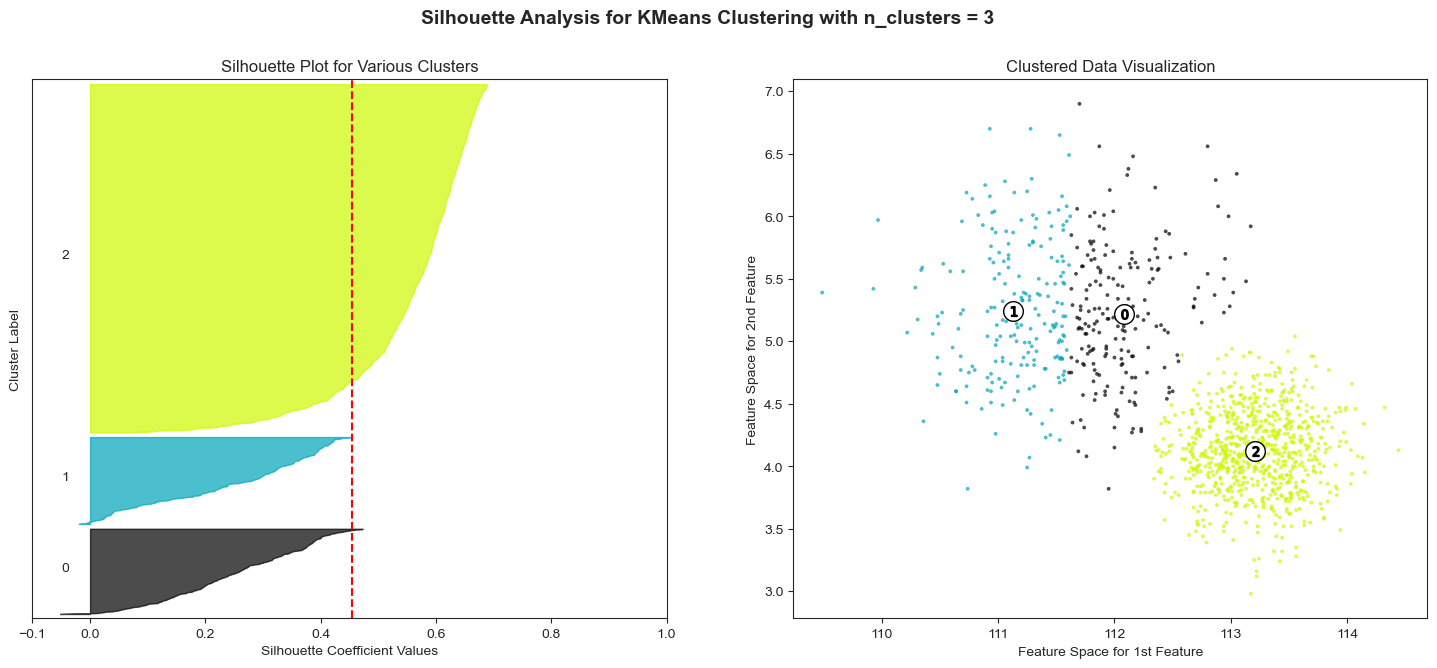

In [54]:
# Visualisation des silhouettes
range_n_clusters = [2, 3]
silhouette_viz(X_train, range_n_clusters)

<span style="color:red">**=> Le score maximum de Silhouette indique le nombre de clusters optimum**</span>
<br><span style="color:red">**=> Dans le cas présent nous choisirons donc 2, nombre optimum de clusters qui est également confirmé par les autres méthodes**</span>

### Elbow method

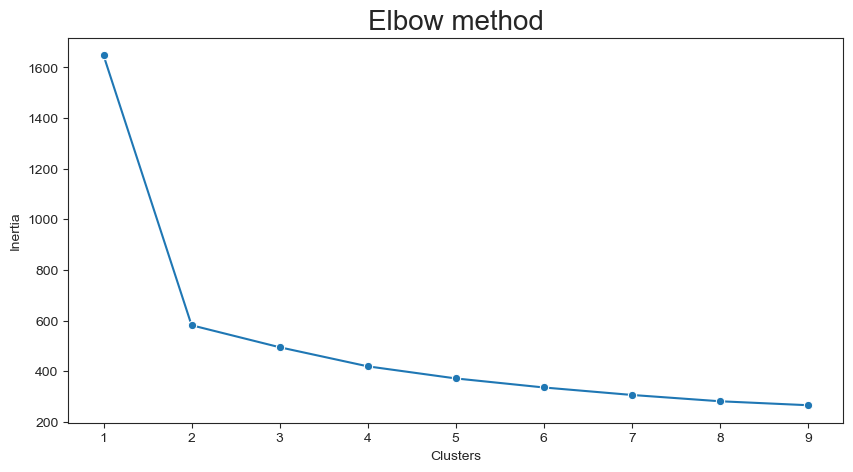

In [55]:
# visualisation méthode du coude
clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X_train)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax,marker="o")

ax.set_title('Elbow method',size=20)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [56]:
# fonction basée sur la méthode du coude calculant le nombre optimal de clusters
kl = KneeLocator (range(1, 10), clusters, curve="convex", direction="decreasing")
print('Le nombre optimal de clusters :', kl.elbow)

Le nombre optimal de clusters : 2


### Gap statistic

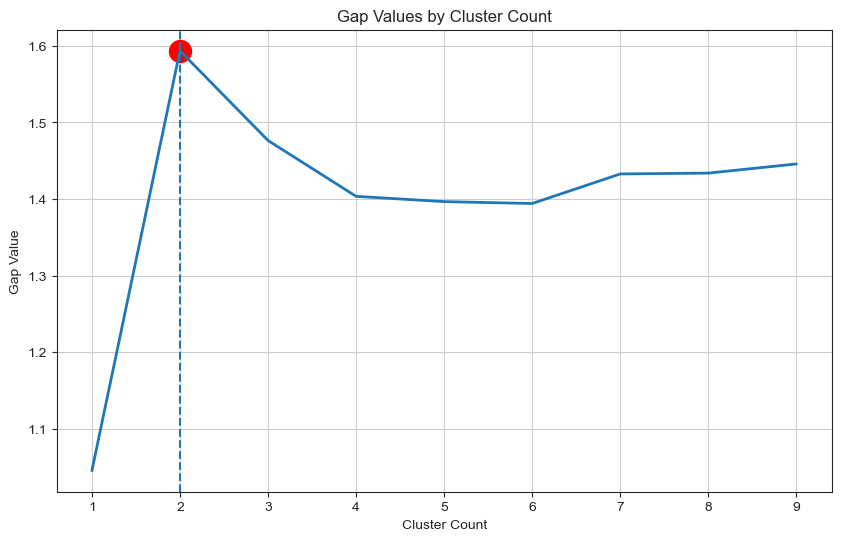

In [57]:
def KMeans_clustering_func(X, k):
    m = KMeans(random_state=11, n_clusters=k, n_init=10)
    m.fit(X)
    # renvoie l'emplacement de chaque centre de cluster et les étiquettes pour chaque point
    return m.cluster_centers_, m.predict(X)

# création d'un wrapper autour d'OptimalK pour extraire les centres de cluster et les étiquettes de cluster
optimalK = OptimalK(clusterer=KMeans_clustering_func)

# exécute Optimal K sur les données d'entrée et le nombre de clusters
n_clusters = optimalK(X_train, cluster_array=np.arange(1, 10))
#print('Optimal clusters: ', n_clusters)
# gap Statistics data frame
#optimalK.gap_df[['n_clusters', 'gap_value']]

# visualisation des valeurs de gap
sns.set_style('ticks')
plt.figure(figsize=(10,6))
n_clusters=2
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=2)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.axvline(2, linestyle="--")
plt.savefig('img/gap_stat.jpeg')
plt.show()

*=> Confirme le nombre de clusters optimal = 2*

## Visualisation des centroïdes

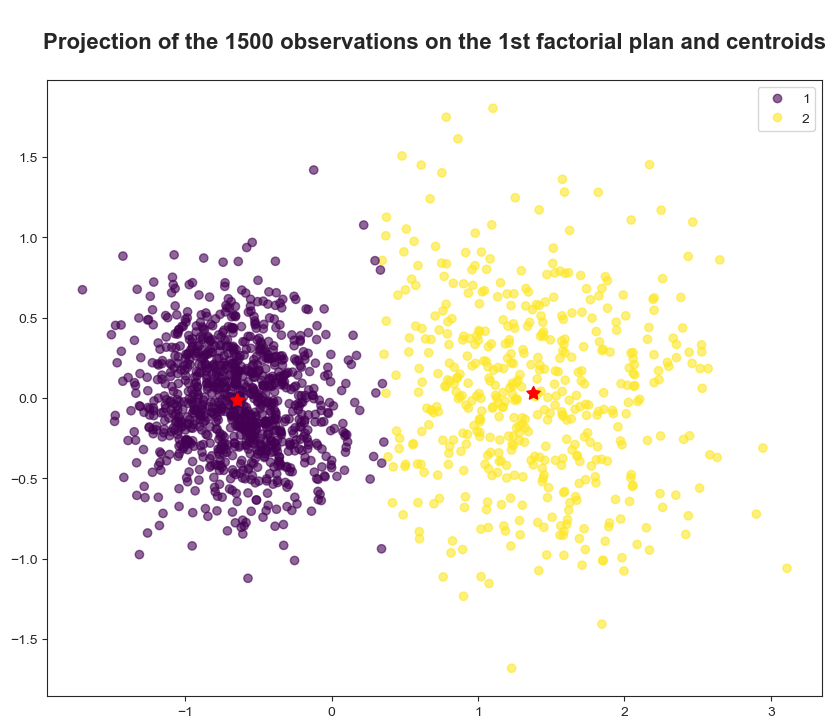

In [58]:
n_clust = 2

# import de l'échantillon
data = billets.drop('is_genuine', axis=1)

# préparation des données pour le clustering
#X_scaled = preprocessing.StandardScaler().fit_transform(data)
#data = X_scaled

pca = decomposition.PCA(n_components=4).fit(data)
X_projected = pca.transform(data)

# clustering par K-means
km_acp = KMeans(n_clusters=n_clust, random_state=10)
km_acp.fit(X_projected)

# récupération des clusters attribués à chaque individu
clusters = km_acp.labels_

# Calcul de la matrice de confusion
confusion = confusion_matrix(clusters, billets['is_genuine'])

# Affichage du clustering par projection des individus sur le premier plan factoriel
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_facecolor("white")
scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap='viridis', alpha=0.6)
classes = ["1", "2", "3", "4"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title(f"\nProjection of the {X_projected.shape[0]} observations on the 1st factorial plan and centroids\n", size=16, fontweight='bold')

# Définition des cluster centers: centroids
centroids = np.array(km_acp.cluster_centers_)
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Scatter plot des centroids_x et centroids_y
plt.scatter(centroids_x, centroids_y, marker=(5, 1), s=100, c="red", alpha=1)
plt.show()

## Évaluation du modèle K-Means

In [59]:
# Clustering par K-means
km = KMeans(n_clusters=2, random_state=3)
km.fit(X_train)

# Prédiction sur l'ensemble de test (X_test)
y_pred = km.predict(X_test)

# Calcul de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)

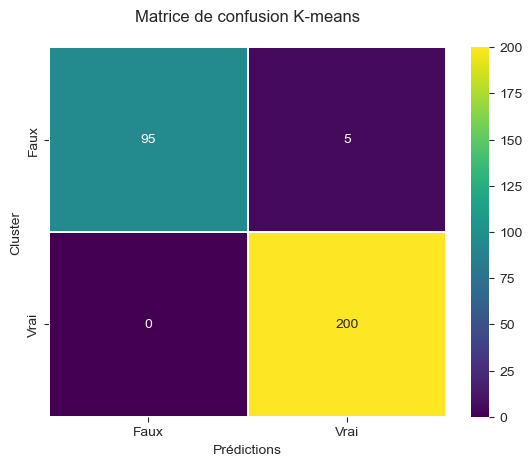

In [60]:
# Affichage de la matrice de confusion
#plt.figure(figsize=(10, 8))
sns.heatmap(confusion,
            annot=True,
            fmt=".3g",
            cmap=sns.color_palette("viridis", as_cmap=True),
            linecolor="white",
            linewidths=0.3,
            xticklabels=["Faux", "Vrai"],
            yticklabels=["Faux", "Vrai"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")
plt.show()

In [61]:
# Création du rapport de classification K-Means
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       1.00      0.95      0.97       100
Predicted False       0.98      1.00      0.99       200

       accuracy                           0.98       300
      macro avg       0.99      0.97      0.98       300
   weighted avg       0.98      0.98      0.98       300



La classification n'est pas parfaite, mais dans l'ensemble les deux groupes sont plutôt correctement labelisés

## Comparaison des clusters K-Means vs. clusters réels

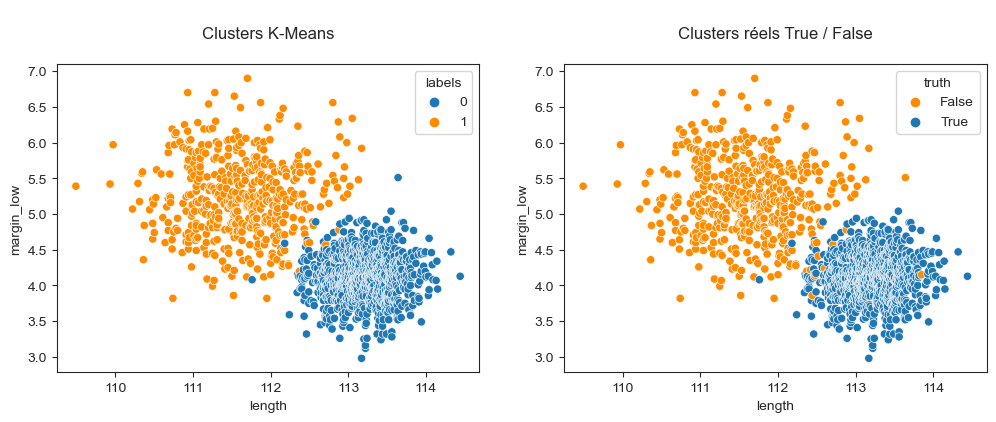

In [62]:
kmeans = KMeans(n_clusters=2, random_state=12)
kmeans.fit(billets)

results = billets.copy()
results['labels'] = kmeans.labels_
results['truth'] = billets['is_genuine']

# Inversion des couleurs pour les labels 'True' et 'False' dans le premier graphique
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=results, x='length', y='margin_low', hue='labels', ax=ax[0], palette={0: '#1F77B4', 1: '#FF8C00'}, edgecolors='b')
sns.scatterplot(data=results, x='length', y='margin_low', hue='truth', ax=ax[1], palette={True: '#1F77B4', False: '#FF8C00'})

# Ajout des titres aux graphiques
ax[0].set_title("\nClusters K-Means\n")
ax[1].set_title("\nClusters réels True / False\n");

=> Nous remarquons quelques erreurs dans le clustering fait par le K-Means mais dans l'ensemble les deux groupes sont plutôt correctement labelisés

# KNN

## Visualisation des scores et taux d'erreurs en fonction du nombre de neighbors


Meilleur nombre de neighbors d'après le taux d'erreur : 4 avec un taux d'erreur de 0.0033
Meilleur nombre de neighbors d'après le score de prédiction : 4 avec un score de 0.9925



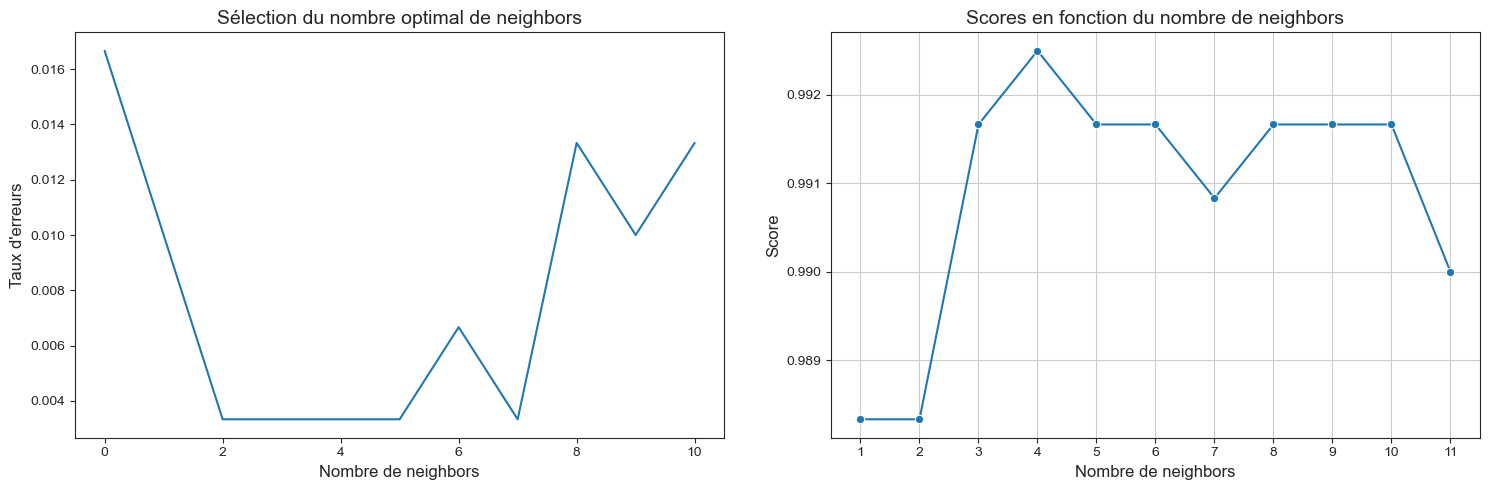

In [63]:
# Figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Premier sous-graphique : Sélection du N optimal
error_rates = []
for i in np.arange(1, 12):
    new_model = KNeighborsClassifier(n_neighbors=i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

best_n_neighbors = np.arange(1, 12)[np.argmin(error_rates)] + 1
min_error = min(error_rates)
print(f"\nMeilleur nombre de neighbors d'après le taux d'erreur : {best_n_neighbors} avec un taux d'erreur de {min_error:.4f}")
axes[0].set_xlabel('Nombre de neighbors', fontsize=12)
axes[0].set_ylabel("Taux d'erreurs", fontsize=12)
axes[0].set_title('Sélection du nombre optimal de neighbors', fontsize=14)
axes[0].plot(error_rates)

# Deuxième sous-graphique : Scores en fonction de n_neighbors
neighbors = np.arange(1, 12)
scores = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    acc = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1)
    scores.append(np.mean(acc))

best_n_neighbors = np.arange(1, 12)[np.argmax(scores)]
best_score = max(scores)
print(f"Meilleur nombre de neighbors d'après le score de prédiction : {best_n_neighbors} avec un score de {best_score:.4f}\n" + '=' * 89, '\n')
axes[1].set_xticks(np.arange(min(neighbors), max(neighbors) + 1, 1))
axes[1].grid(True)
sns.lineplot(x=neighbors, y=scores, marker='o', ax=axes[1])
axes[1].set_title('Scores en fonction du nombre de neighbors', fontsize=14)
axes[1].set_xlabel('Nombre de neighbors', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)

# Affichage des graphiques
plt.tight_layout(w_pad=3)
plt.show()

## Création du meilleur modèle avec les paramètres GridSearch

In [64]:
# Instanciation du modèle (KNN)
knn = KNeighborsClassifier()

# Attribution d'un dictionnaire d'hyperparamètres à rechercher
cv_params = {'n_neighbors': [3, 4, 5, 6, 7],  
             'weights': ['uniform', 'distance'], 
             'p': [1, 2],  
             'leaf_size': [30, 40, 50],  
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Attribution d'un dictionnaire de métriques à capturer
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciation de GridSearch
knn = GridSearchCV(knn, cv_params, scoring=scoring, cv=4, verbose=True, refit='roc_auc')

knn.fit(X_train, y_train)

# Affichage du meilleur paramètre
print(f"Les meilleurs paramètres sont : {knn.best_params_} avec un score de {round(knn.best_score_, 3)}")

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Les meilleurs paramètres sont : {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'} avec un score de 0.99


In [65]:
# Scores de cross-validation
knn_cv_results = make_results('KNN cv', knn, 'auc')
knn_cv_results

Model   AUC  Precision  Recall    F1  Accuracy
0  KNN cv 0.990      0.990   0.998 0.994     0.992

In [66]:
# Scores de prédictions sur le test set
knn_test_scores = get_scores('KNN test', knn, X_test, y_test)
knn_test_scores

model   AUC  precision  recall    f1  accuracy
0  KNN test 0.990      0.990   1.000 0.995     0.993

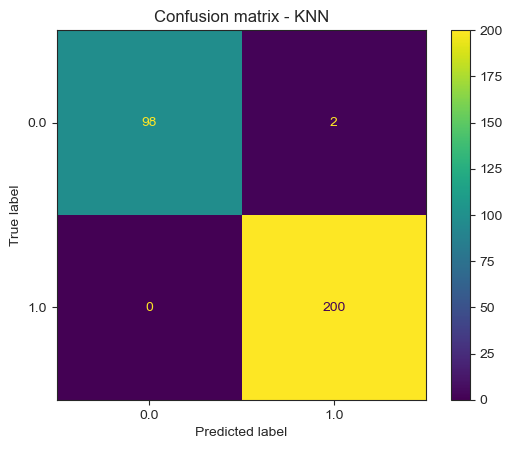

In [67]:
# Générer un tableau de valeurs pour la matrice de confusion
y_pred = knn.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
disp.plot()
plt.title("Confusion matrix - KNN");

In [68]:
# Création du rapport de classification KNN
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       1.00      0.98      0.99       100
Predicted False       0.99      1.00      1.00       200

       accuracy                           0.99       300
      macro avg       1.00      0.99      0.99       300
   weighted avg       0.99      0.99      0.99       300



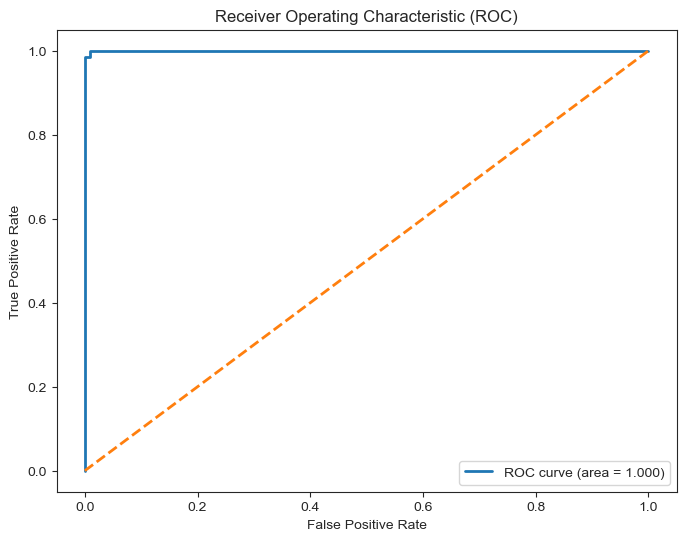

In [69]:
# Prédire les probabilités sur l'ensemble de test
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculer l'AUC (aire sous la courbe)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Tree-based Models

## Decision tree

### Création du meilleur modèle avec les paramètres GridSearch

In [70]:
# Instanciation du modèle (Decision Tree)
tree = DecisionTreeClassifier(random_state=0)

# Attribution d'un dictionnaire d'hyperparamètres à rechercher
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Attribution d'un dictionnaire de métriques à capturer
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciation de GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

#%%time
tree1.fit(X_train, y_train) #--> Wall time: 1.24 s

# Affichage du meilleur paramètre
print(f"Les meilleurs paramètres sont : {tree1.best_params_} avec un score de {round(tree1.best_score_, 3)} sur le train set")

Les meilleurs paramètres sont : {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2} avec un score de 0.992 sur le train set


In [71]:
# Scores de cross-validation
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

Model   AUC  Precision  Recall    F1  Accuracy
0  decision tree cv 0.992      0.984   0.988 0.986     0.981

In [72]:
# Scores de prédictions sur le test set
tree_test_scores = get_scores('decision tree test', tree1, X_test, y_test)
tree_test_scores

model   AUC  precision  recall    f1  accuracy
0  decision tree test 0.980      0.980   1.000 0.990     0.987

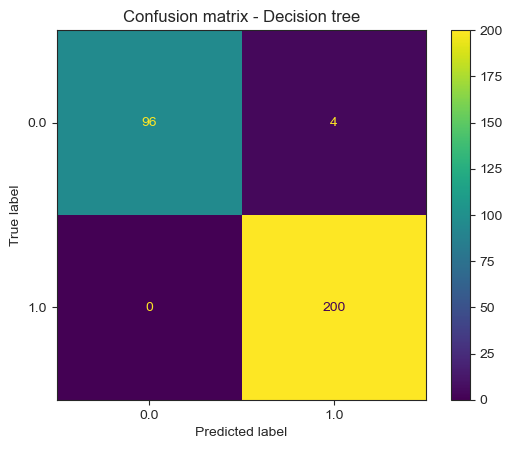

In [73]:
# Générer un tableau de valeurs pour la matrice de confusion
y_pred = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=tree1.classes_)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree1.classes_)
disp.plot()
plt.title("Confusion matrix - Decision tree");

In [74]:
# Création du rapport de classification Decision Tree
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       1.00      0.96      0.98       100
Predicted False       0.98      1.00      0.99       200

       accuracy                           0.99       300
      macro avg       0.99      0.98      0.98       300
   weighted avg       0.99      0.99      0.99       300



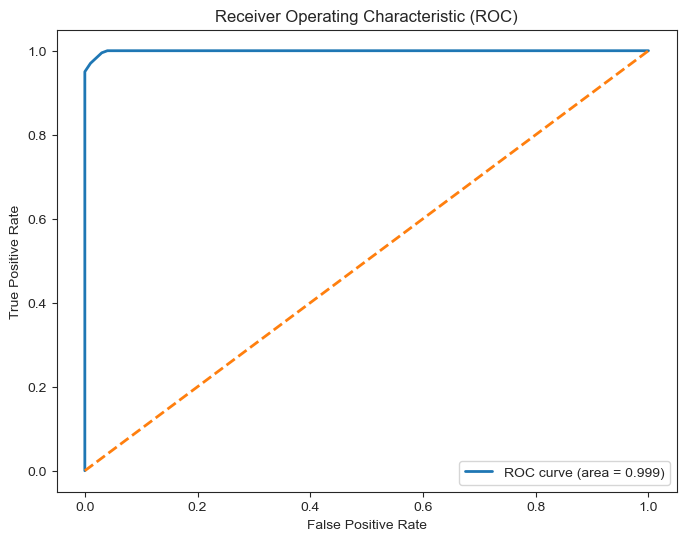

In [75]:
# Prédire les probabilités sur l'ensemble de test
y_pred_prob = tree1.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculer l'AUC (aire sous la courbe)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Tous ces scores du modèle d'arbre de décision indiquent une bonne performance du modèle.

Cependant, les arbres de décision peuvent être vulnérables à l'overfitting, et les forêts aléatoires évitent le surajustement en incorporant plusieurs arbres pour effectuer des prédictions. Nous construirons par la suite un modèle de forêt aléatoire.

### Decision tree : importance des caractéristiques

In [76]:
# Créaton du Dataframe de l'importance des variables
tree1_importances = pd.DataFrame({'gini_importance': tree1.best_estimator_.feature_importances_}, index=X_train.columns)
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Extraire les caractéristiques qui ont une importance > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

gini_importance
length                0.882
margin_low            0.115
margin_up             0.003

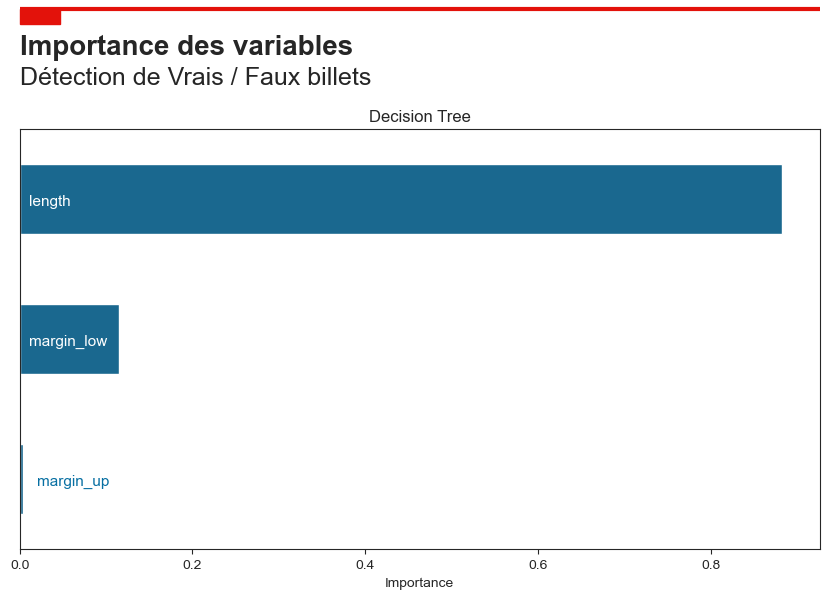

In [77]:
# Données fictives pour la position des noms
y = [0, 1, 2, 3, 4]

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h', ax=ax, color=BLUE, width=0.5)
ax.set_title("Decision Tree", fontsize=12)
ax.set_xlabel("Importance")

# Supprimer les étiquettes de l'axe des y (noms de la variable y)
ax.set(yticklabels=[])
ax.set(yticks=[])

# Réglage des marges de la figure
fig.subplots_adjust(left=0, right=1, top=0.8, bottom=0.1)

# Ajout de texte
fig.text(0, 0.925, "Importance des variables", fontsize=20, fontweight="bold")
fig.text(0, 0.83, "Détection de Vrais / Faux billets\n", fontsize=18)

# Ajout caption
#source = "Source: Zofia Quillet / ONCFM"
#fig.text(0, -0.018, source, color=GREY, fontsize=10)

# Ajout de ligne et de rectangle
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Définir la couleur de fond de la figure
fig.set_facecolor("white")

# Noms et comptes des caractéristiques
names = tree1_importances.index
counts = [0.01, 0.01, 0.3, 0.3, 0.3]
PAD1 = 0.011
PAD2 = 0.02
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = "white" if count < 0.025 else BLUE

    ax.text(x + PAD1 if count < 0.025 else x + PAD2,
            y_pos + 0.03 / 2,
            name,
            color=color,
            fontsize=11,
            va="center")

# Afficher la figure
plt.show()

### Visualisation de l'arbre décisionnel

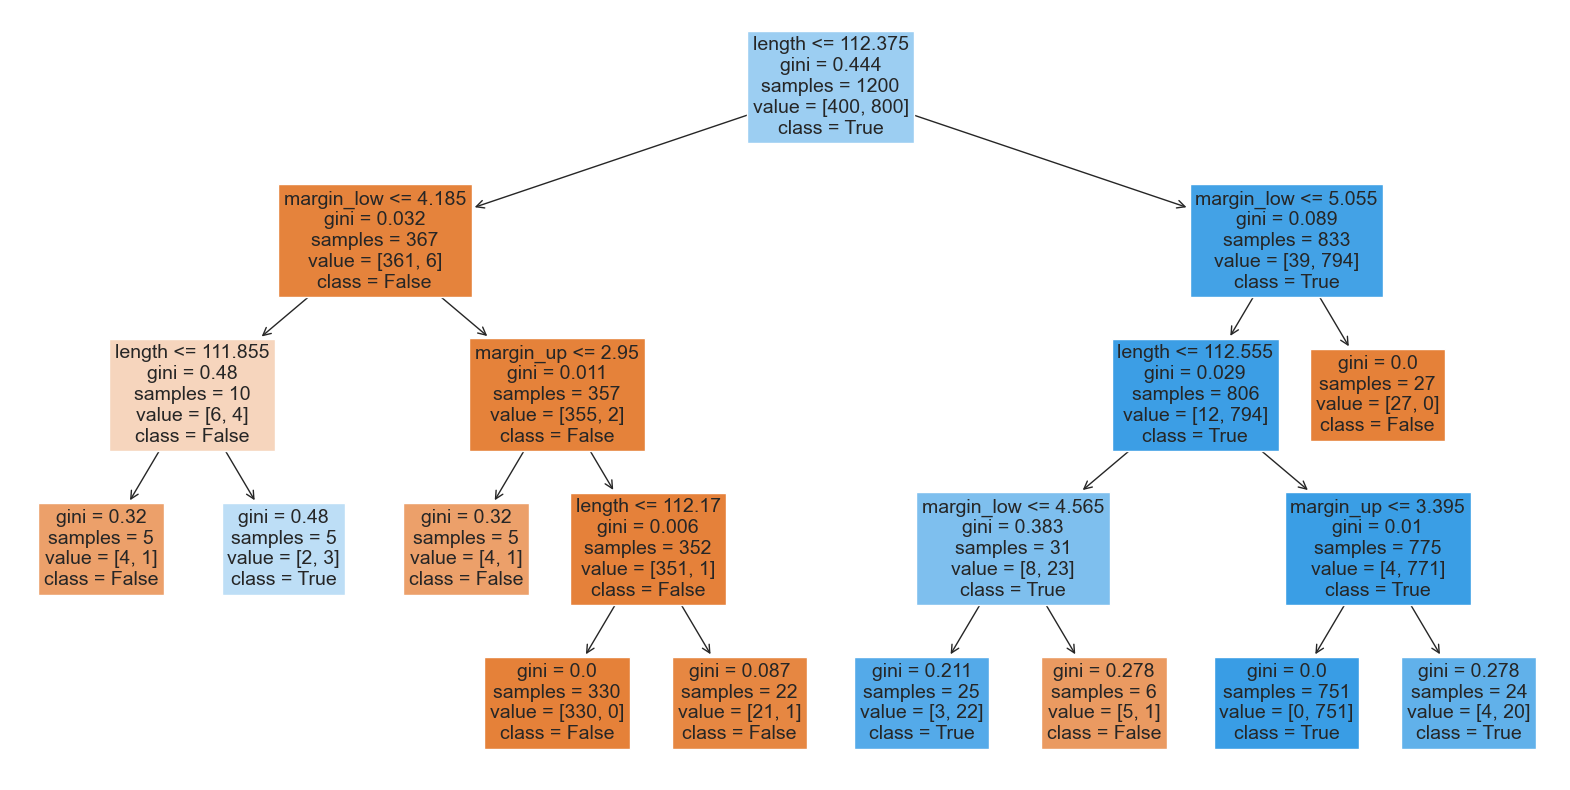

In [88]:
plt.figure(figsize=(20,10))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X_train.columns, 
          class_names={0:'False', 1:'True'}, filled=True)
plt.show()

## Random forest

### Création du meilleur modèle avec les paramètres GridSearch

In [79]:
# Instanciation du modèle (Random Forest)
rf = RandomForestClassifier(random_state=0)

# Attribution d'un dictionnaire d'hyperparamètres à rechercher
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Attribution d'un dictionnaire de métriques à capturer
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciation de GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

#%%time
rf1.fit(X_train, y_train) # --> Wall time: 5min 17s

# affichage du meilleur paramètre
print(f"Les meilleurs paramètres sont : {rf1.best_params_} avec un score de {round(rf1.best_score_, 3)}")

Les meilleurs paramètres sont : {'max_depth': None, 'max_features': 1.0, 'max_samples': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300} avec un score de 0.999


In [80]:
# Scores de cross-validation
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

Model   AUC  Precision  Recall    F1  Accuracy
0  random forest cv 0.999      0.985   0.991 0.988     0.984

In [81]:
# Scores de prédictions sur le test set
rf1_test_scores = get_scores('random forest test', rf1, X_test, y_test)
rf1_test_scores

model   AUC  precision  recall    f1  accuracy
0  random forest test 0.995      0.995   1.000 0.998     0.997

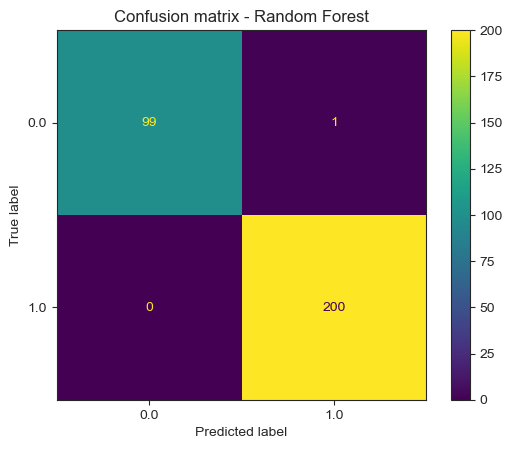

In [82]:
# Générer un tableau de valeurs pour la matrice de confusion
y_pred = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=rf1.classes_)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot()

plt.title("Confusion matrix - Random Forest");

In [83]:
# Création du rapport de classification Random Forest
target_names = ['Predicted True', 'Predicted False']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Predicted True       1.00      0.99      0.99       100
Predicted False       1.00      1.00      1.00       200

       accuracy                           1.00       300
      macro avg       1.00      0.99      1.00       300
   weighted avg       1.00      1.00      1.00       300



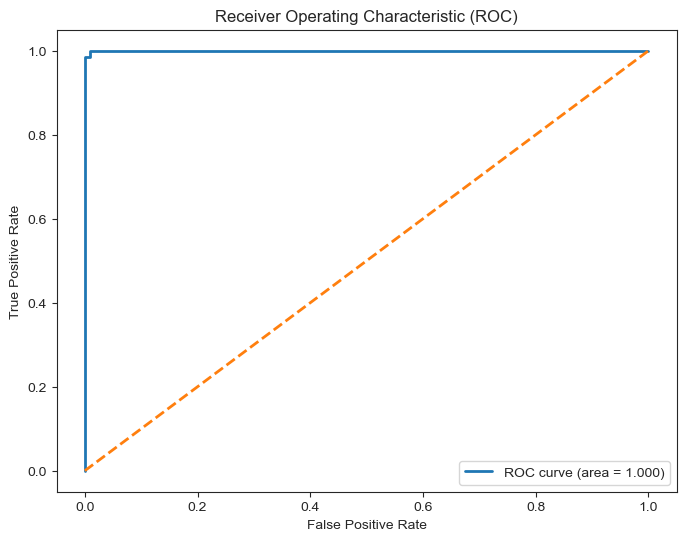

In [84]:
# Prédire les probabilités sur l'ensemble de test
y_pred_prob = rf1.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculer l'AUC (aire sous la courbe)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Random forest : importance des caractéristiques

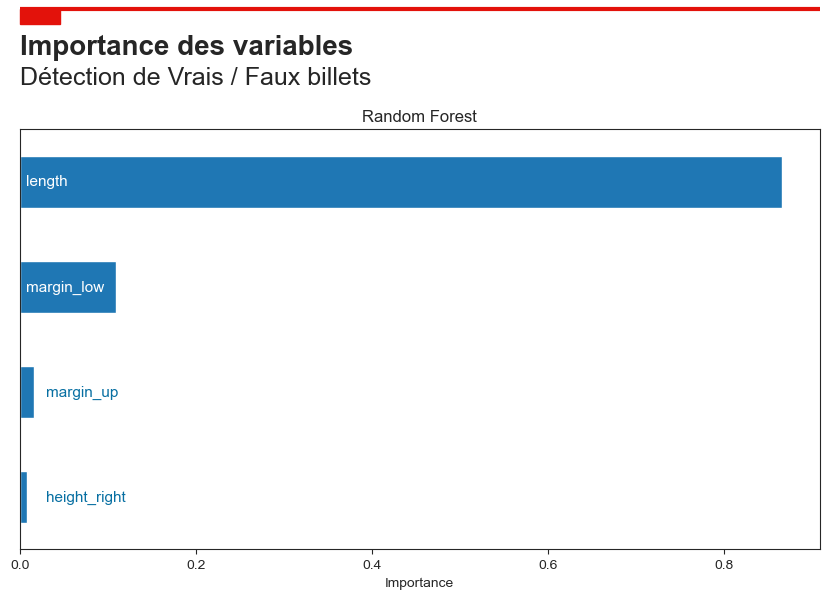

In [85]:
y = [0, 1, 2, 3]

# Obtenir les features importances
feat_impt = rf1.best_estimator_.feature_importances_

# Indices des 4 meilleures caractéristiques
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -4)[-4:]

# Étiquettes de colonnes des 4 meilleures caractéristiques
feat = X_train.columns[ind]

# Filtrer 'feat_impt' pour qu'il contienne uniquement les 4 meilleures features importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat, "Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")

# Création de la figure et des axes pour le graphique
fig, ax = plt.subplots(figsize=(8, 6))

# Graphique à barres horizontales
y_sort_df.plot(kind='barh', ax=ax, x="Feature", y="Importance", legend=False)

# Titre et les étiquettes du graphique
ax.set_title("Random Forest", fontsize=12)
ax.set_ylabel("")
ax.set_xlabel("Importance")

# Supprimer les étiquettes de l'axe des y (noms de la variable y)
ax.set(yticklabels=[])
ax.set(yticks=[])

# Réglage des marges de la figure
fig.subplots_adjust(left=0, right=1, top=0.8, bottom=0.1)

# Ajout de texte
fig.text(0, 0.925, "Importance des variables", fontsize=20, fontweight="bold")
fig.text(0, 0.83, "Détection de Vrais / Faux billets\n", fontsize=18)

# Ajout caption
#source = "Source: Zofia Quillet / ONCFM"
#fig.text(0, -0.018, source, color=GREY, fontsize=10)

# Ajout de ligne et de rectangle
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Couleur de fond de la figure
fig.set_facecolor("white")

# Noms et comptes des caractéristiques
names = y_sort_df['Feature'].tolist()
counts = [0.01, 0.025, 0.3, 0.3]
PAD1 = 0.03
PAD2 = 0.0076
for name, count, y_pos in zip(names, counts, y):
    x = 0
    color = BLUE if count < 0.028 else "white"

    ax.text(x + PAD1 if count < 0.028 else x + PAD2,
            y_pos,
            name,
            color=color,
            fontsize=11,
            va="center")

# Afficher la figure
plt.show()

### Visualisation du premier arbre de la forêt aléatoire

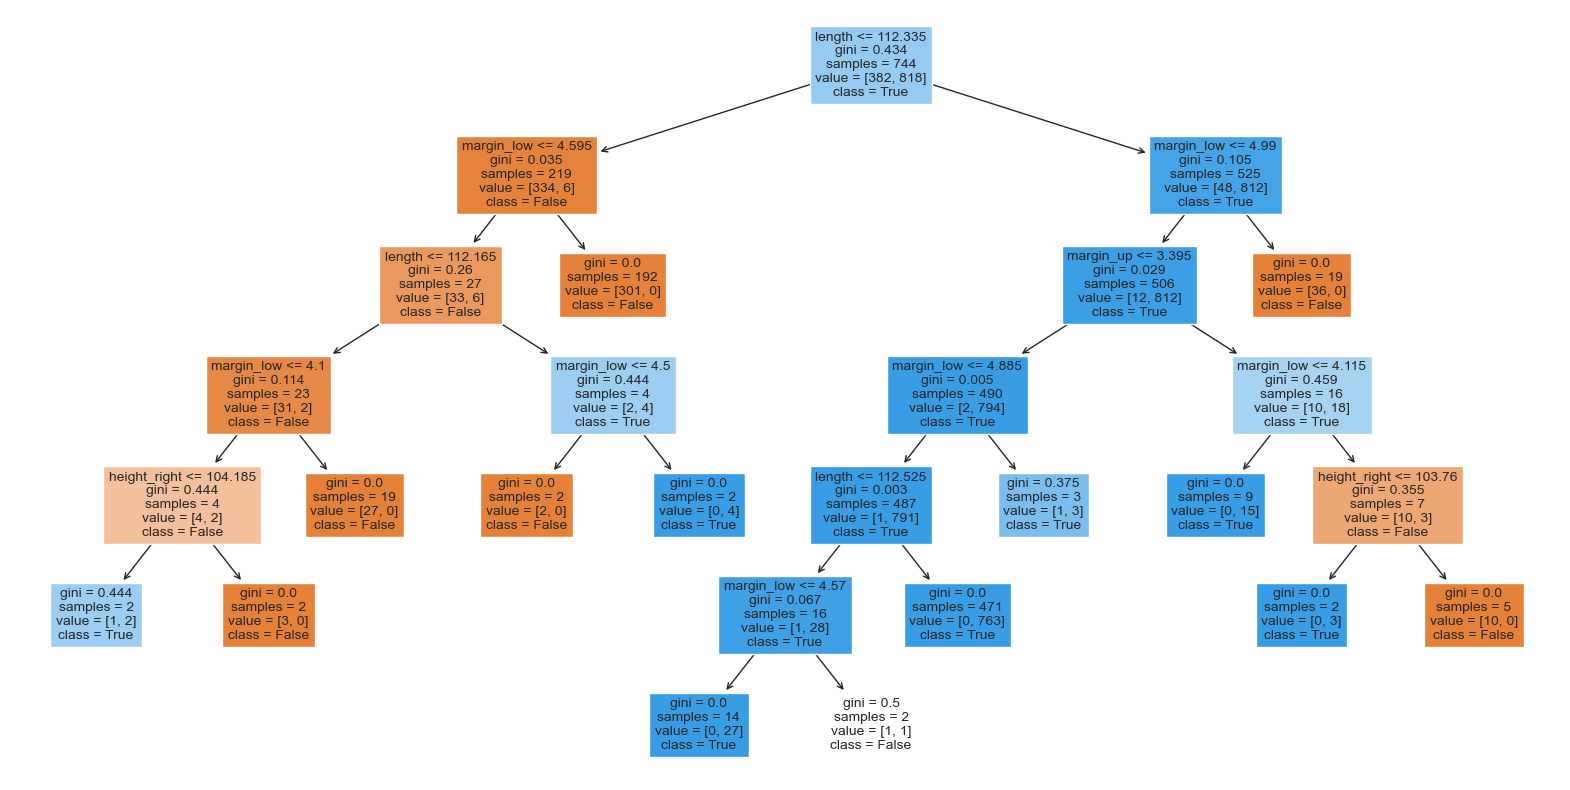

In [86]:
plt.figure(figsize=(20, 10))
plot_tree(rf1.best_estimator_.estimators_[0], max_depth=6, fontsize=10, filled=True, 
          feature_names=X_train.columns, class_names=['False', 'True'])
plt.show()

# Comparaison des scores des cinq modèles évalués sur le test set

In [87]:
# Récupération des résultats sur l'ensemble de test pour les trois modèles GridSearch
tree1_results = get_scores('decision tree', tree1, X_test, y_test)
rf1_results = get_scores('random forest', rf1, X_test, y_test)
knn_results = get_scores('knn', knn, X_test, y_test)

def get_model_scores(model_name, model, X_test, y_test):
    # Prédictions du modèle
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Création d'un DataFrame pour stocker les résultats
    scores = pd.DataFrame({'model': model_name,
                           'AUC': [auc],
                           'precision': [precision],
                           'recall': [recall],
                           'f1': [f1],
                           'accuracy': [accuracy]})
    return scores

# Scores du modèle final de régression logistique sur les données de test
lr1_scores = get_model_scores('logistic regression', lr1, X_test, y_test)

# Scores du modèle K-Means sur les données de test
kmeans_scores = get_model_scores('k-means', km, X_test, y_test)

# Ajout des scores au DataFrame existant
all_results = pd.concat([tree1_results, rf1_results, knn_results, kmeans_scores, lr1_scores]).sort_values(by='AUC', ascending=False)
all_results

model   AUC  precision  recall    f1  accuracy
0        random forest 0.995      0.995   1.000 0.998     0.997
0  logistic regression 0.995      0.995   1.000 0.998     0.997
0                  knn 0.990      0.990   1.000 0.995     0.993
0        decision tree 0.980      0.980   1.000 0.990     0.987
0              k-means 0.975      0.976   1.000 0.988     0.983

<span style="color:red">**=> Ici nous constatons que notre modèle final de régression logistique, qui sera celui utilisé pour la création de l'algorithme de détection des vrais / faux billets, présente de très bons résultats par rapport aux autres modèles : quasi similaires à ceux du Random Forest et meilleurs que ceux du KNN et K-Means**</span>